# Libraries

In [1]:
import random
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Adult Data Preprocessing

### Data Cleaning

In [3]:
features_names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country"]
categorical_features_names = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]
continous_features_names = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
label_name = ["label"]


In [4]:
df_train = pd.read_csv('adult/adult.data', names=features_names+label_name)
df_test = pd.read_csv('adult/adult.test', names=features_names+label_name).drop(0)
df_test = df_test.replace(' >50K.', ' >50K')
df_test = df_test.replace(' <=50K.', ' <=50K')
train_size = df_train.shape[0]
test_size = df_test.shape[0]
train_data_without_missing = df_train[(df_train != ' ?').all(axis=1)].copy()
test_data_without_missing = df_test[(df_test != ' ?').all(axis=1)].copy()

In [5]:
train_data_without_missing

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
train_missing_data = df_train[(df_train == ' ?').any(axis=1)].copy()
test_missing_data = df_test[(df_test == ' ?').any(axis=1)].copy()

In [7]:
train_missing_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [8]:
for f in features_names:
  train_missing_data.loc[train_missing_data[f] == ' ?', f] = train_data_without_missing[f].mode()[0] # replaced with the mode in train
  test_missing_data.loc[test_missing_data[f] == ' ?', f] = train_data_without_missing[f].mode()[0] # replaced with the mode in train

In [9]:
train_missing_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>50K
27,54,Private,180211,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,United-States,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,United-States,<=50K
61,32,Private,293936,7th-8th,4,Married-spouse-absent,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,Private,320084,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,55,United-States,>50K
32531,30,Private,33811,Bachelors,13,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,Private,287372,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,10,United-States,>50K
32541,41,Private,202822,HS-grad,9,Separated,Prof-specialty,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [10]:
train_cleaned_data = pd.concat([train_data_without_missing, train_missing_data], ignore_index=True)
test_cleaned_data = pd.concat([test_data_without_missing, test_missing_data], ignore_index=True)

In [11]:
train_cleaned_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,35,Private,320084,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,55,United-States,>50K
32557,30,Private,33811,Bachelors,13,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32558,71,Private,287372,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,10,United-States,>50K
32559,41,Private,202822,HS-grad,9,Separated,Prof-specialty,Not-in-family,Black,Female,0,0,32,United-States,<=50K


### Feature Scaling

In [12]:
scaler = MinMaxScaler()
scaler.fit(train_cleaned_data[continous_features_names])
train_cleaned_data[continous_features_names] = scaler.transform(train_cleaned_data[continous_features_names])
test_cleaned_data[continous_features_names] = scaler.transform(test_cleaned_data[continous_features_names])

In [13]:
train_cleaned_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States,<=50K
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States,<=50K
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States,<=50K
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba,<=50K


In [14]:
test_cleaned_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,0.109589,Private,0.145690,11th,0.400000,Never-married,Machine-op-inspct,Own-child,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
1,0.287671,Private,0.052654,HS-grad,0.533333,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000000,0.0,0.500000,United-States,<=50K
2,0.150685,Local-gov,0.220498,Assoc-acdm,0.733333,Married-civ-spouse,Protective-serv,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K
3,0.369863,Private,0.100541,Some-college,0.600000,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.076881,0.0,0.397959,United-States,>50K
4,0.232877,Private,0.126600,10th,0.333333,Never-married,Other-service,Not-in-family,White,Male,0.000000,0.0,0.295918,United-States,<=50K


### One-hot Encoding

In [15]:
df = pd.concat([train_cleaned_data, test_cleaned_data], ignore_index=True)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States,<=50K
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States,<=50K
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States,<=50K
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.054795,Private,0.136086,Some-college,0.600000,Never-married,Prof-specialty,Own-child,White,Female,0.00000,0.0,0.295918,United-States,<=50K
48838,0.767123,Private,0.090047,HS-grad,0.533333,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.00000,0.0,0.244898,Canada,<=50K
48839,0.876712,Private,0.009797,Assoc-voc,0.666667,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.02936,0.0,0.193878,United-States,<=50K
48840,0.452055,Local-gov,0.086295,Masters,0.866667,Married-civ-spouse,Prof-specialty,Wife,White,Female,0.00000,0.0,0.397959,United-States,>50K


In [16]:
onehot_encoded_data = pd.get_dummies(df, columns=categorical_features_names)
onehot_encoded_data['label'] = onehot_encoded_data['label'].replace({" >50K" : 1, " <=50K" : 0})
onehot_encoded_data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data Shuffling

In [17]:
train_data = onehot_encoded_data.loc[:train_size-1]
test_data = onehot_encoded_data.loc[train_size:]
train_data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.246575,0.209043,0.800000,0.00000,0.0,0.551020,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,0.178082,0.014619,0.800000,0.00000,0.0,1.000000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,0.739726,0.186826,1.000000,0.00000,0.0,0.091837,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,0.328767,0.129404,0.533333,0.00000,0.0,0.316327,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
test_data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
32561,0.109589,0.145690,0.400000,0.000000,0.0,0.397959,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32562,0.287671,0.052654,0.533333,0.000000,0.0,0.500000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32563,0.150685,0.220498,0.733333,0.000000,0.0,0.397959,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32564,0.369863,0.100541,0.600000,0.076881,0.0,0.397959,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32565,0.232877,0.126600,0.333333,0.000000,0.0,0.295918,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.054795,0.136086,0.600000,0.000000,0.0,0.295918,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,0.767123,0.090047,0.533333,0.000000,0.0,0.244898,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48839,0.876712,0.009797,0.666667,0.029360,0.0,0.193878,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,0.452055,0.086295,0.866667,0.000000,0.0,0.397959,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
shuffled_train_data = train_data.sample(frac=1).reset_index(drop=True)
shuffled_test_data = test_data.sample(frac=1).reset_index(drop=True)
shuffled_train_data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.438356,0.126645,0.733333,0.150242,0.000000,0.602041,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.315068,0.143005,0.333333,0.000000,0.000000,0.316327,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.547945,0.088634,0.200000,0.000000,0.367769,0.020408,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.054795,0.101834,0.533333,0.000000,0.000000,0.295918,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.273973,0.119594,0.533333,0.000000,0.000000,0.397959,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# K-fold Cross Validation for Adult Data

In [20]:
x_train = np.array(shuffled_train_data[shuffled_train_data.columns.difference(label_name)])
y_train = np.array(shuffled_train_data[label_name]).astype('uint8').squeeze()
x_test = np.array(shuffled_test_data[shuffled_test_data.columns.difference(label_name)])
y_test = np.array(shuffled_test_data[label_name]).astype('uint8').squeeze()

In [21]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(32561, 105)
(32561,)
(16281, 105)
(16281,)


In [22]:
def k_fold_cross_validation(model_name, max_param, x_data, y_data, fold_num=5):
  data_size = x_data.shape[0]
  fold_size = int(data_size / fold_num)
  train_acc_matrix = np.zeros((fold_num,max_param))
  valid_acc_matrix = np.zeros((fold_num,max_param))
  
  for i in range(fold_num):
    # Split the data
    validation_indices = np.array([False] * data_size)
    validation_indices[i*fold_size : (i+1)*fold_size] = True
    train_indices = ~validation_indices
    x_train = x_data[train_indices]
    x_valid = x_data[validation_indices]
    y_train = y_data[train_indices]
    y_valid = y_data[validation_indices]

    # Train the model
    if model_name == 'knn':
      res_a, res_b = knn_CV(x_train, y_train, x_valid, y_valid, i, max_param)
    elif model_name == 'decision_tree':
      res_a, res_b = decision_tree_CV(x_train, y_train, x_valid, y_valid, i, max_param)
    train_acc_matrix[i][:] = res_a
    valid_acc_matrix[i][:] = res_b

  train_acc_mean = train_acc_matrix.mean(axis=0)
  train_acc_var = train_acc_matrix.var(axis=0)
  valid_acc_mean = valid_acc_matrix.mean(axis=0)
  valid_acc_var = valid_acc_matrix.var(axis=0)
  
  return [train_acc_mean, train_acc_var, valid_acc_mean, valid_acc_var]

# KNN Cross Validation for Adult Data

In [23]:
def knn_CV(x_train, y_train, x_valid, y_valid, CV_num, max_K):
  
  K_range = range(1,max_K+1)

  KNN_valid_acc_list = np.zeros((1,max_K))
  KNN_train_acc_list = np.zeros((1,max_K))
  for k in K_range:
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(x_train, y_train)
    KNN_y_pred = KNN.predict(x_valid)
    KNN_valid_acc_list[0][k-1] = metrics.accuracy_score(y_valid, KNN_y_pred)
    KNN_train_acc_list[0][k-1] = metrics.accuracy_score(y_train, KNN.predict(x_train))
    
  plt.plot(K_range, KNN_valid_acc_list.squeeze())
  plt.xlabel('# of neighbors (K) for KNN - CV fold #' + str(CV_num))
  plt.ylabel('Accuracy')
  plt.plot(K_range, KNN_train_acc_list.squeeze())
  plt.legend(['Validation', 'Training'])
  plt.show()

  plot_confusion_matrix(KNN, x_valid, y_valid)
  plt.show()

  print(classification_report(y_valid, KNN_y_pred))

  return [KNN_train_acc_list, KNN_valid_acc_list]

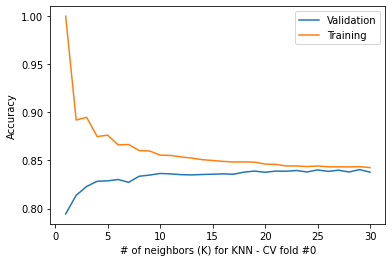

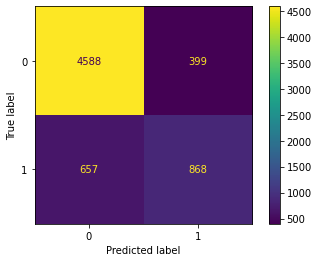

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      4987
           1       0.69      0.57      0.62      1525

    accuracy                           0.84      6512
   macro avg       0.78      0.74      0.76      6512
weighted avg       0.83      0.84      0.83      6512



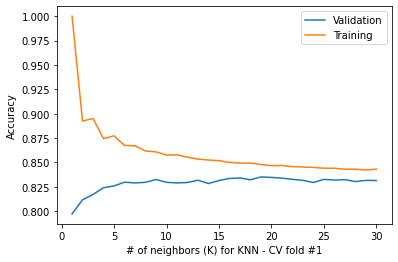

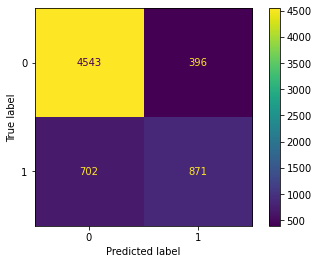

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4939
           1       0.69      0.55      0.61      1573

    accuracy                           0.83      6512
   macro avg       0.78      0.74      0.75      6512
weighted avg       0.82      0.83      0.82      6512



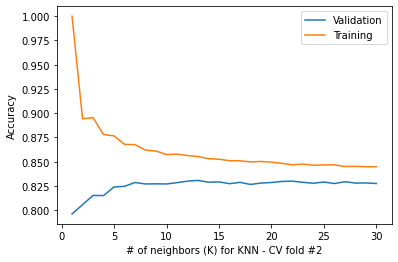

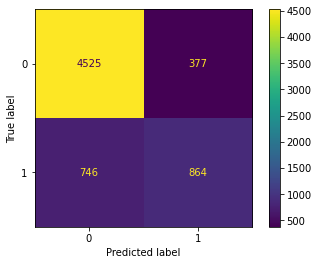

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4902
           1       0.70      0.54      0.61      1610

    accuracy                           0.83      6512
   macro avg       0.78      0.73      0.75      6512
weighted avg       0.82      0.83      0.82      6512



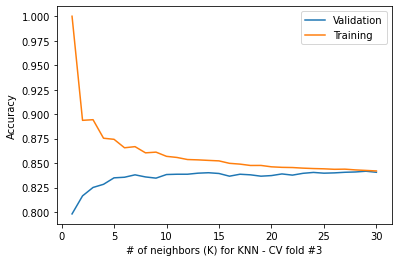

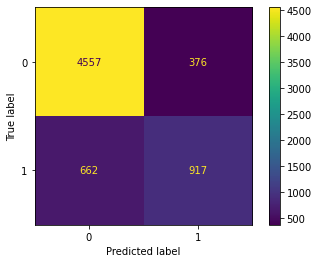

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      4933
           1       0.71      0.58      0.64      1579

    accuracy                           0.84      6512
   macro avg       0.79      0.75      0.77      6512
weighted avg       0.83      0.84      0.83      6512



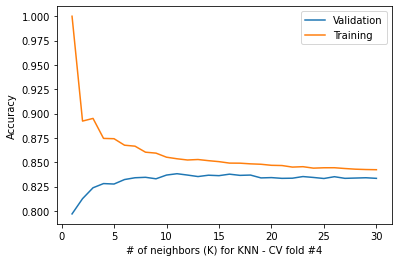

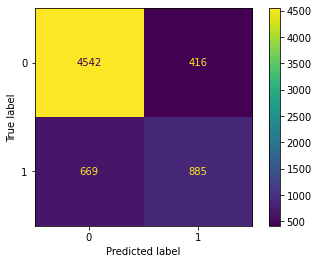

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4958
           1       0.68      0.57      0.62      1554

    accuracy                           0.83      6512
   macro avg       0.78      0.74      0.76      6512
weighted avg       0.83      0.83      0.83      6512



In [24]:
knn_train_acc_mean, knn_train_acc_var, knn_valid_acc_mean, knn_valid_acc_var = k_fold_cross_validation('knn', 30, x_train, y_train, fold_num=5)

In [25]:
print('Training accuracy mean of K-fold CV, for different values of hyperparameter (K neighbors)\n', knn_train_acc_mean, '\n')
print('Training accuracy Variance of K-fold, CV for different values of hyperparameter (K neighbors)\n', knn_train_acc_var, '\n')
print('Validation accuracy mean of K-fold CV, for different values of hyperparameter (K neighbors)\n', knn_valid_acc_mean, '\n')
print('Validation accuracy Variance of K-fold, CV for different values of hyperparameter (K neighbors)\n', knn_valid_acc_var, '\n')

Training accuracy mean of K-fold CV, for different values of hyperparameter (K neighbors)
 [0.99997697 0.89292487 0.89492111 0.87538101 0.87574187 0.86691236
 0.86690468 0.86094668 0.86042458 0.85649353 0.85600215 0.85424392
 0.85344543 0.8521402  0.85142616 0.84977542 0.84932243 0.84870053
 0.84837038 0.84709586 0.84665822 0.84544512 0.84546048 0.84463895
 0.84466966 0.84442397 0.84374064 0.8434796  0.84310338 0.84294983] 

Training accuracy Variance of K-fold, CV for different values of hyperparameter (K neighbors)
 [3.53695171e-10 7.42995656e-07 1.42892849e-07 1.80467066e-06
 1.69148821e-06 7.34153276e-07 1.82742505e-07 5.41978900e-07
 5.46105344e-07 9.95298211e-07 2.66568260e-06 2.09411121e-06
 1.05200734e-06 7.15996924e-07 1.00060364e-06 5.72632482e-07
 8.34720603e-07 6.44550500e-07 9.88813799e-07 1.65765137e-06
 8.87539082e-07 7.48065286e-07 1.27247733e-06 9.43776614e-07
 1.04894198e-06 1.49766325e-06 5.02600838e-07 8.07839770e-07
 9.49082042e-07 1.10176046e-06] 

Validation accu

Finding the best hyperparameter

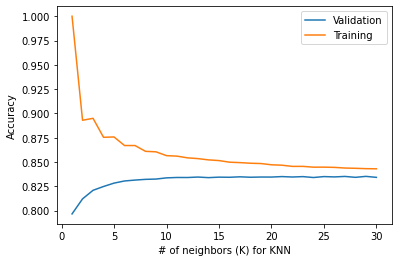

In [26]:
K_range = range(1,len(knn_train_acc_mean)+1)
plt.plot(K_range, knn_valid_acc_mean)
plt.xlabel('# of neighbors (K) for KNN')
plt.ylabel('Accuracy')
plt.plot(K_range, knn_train_acc_mean)
plt.legend(['Validation', 'Training'])
plt.show()

The best value for K is approximately 12. So, we pick **K=12**.

# Sampling growing subsets of the training/validation data (KNN - Adult data)

### 1% of whole training/validation data

In [27]:
sample_idx_1_percent = random.sample(range(x_train.shape[0]), int(x_train.shape[0] * 0.01))
x_sample_data_1_percent = x_train.copy()[sample_idx_1_percent,:]
y_sample_data_1_percent = y_train.copy()[sample_idx_1_percent]
x_sample_data_1_percent.shape

(325, 105)

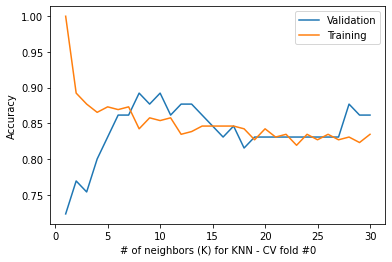

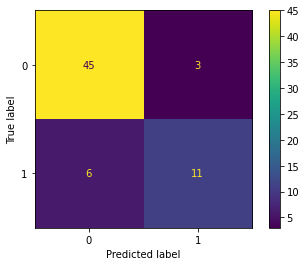

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        48
           1       0.79      0.65      0.71        17

    accuracy                           0.86        65
   macro avg       0.83      0.79      0.81        65
weighted avg       0.86      0.86      0.86        65



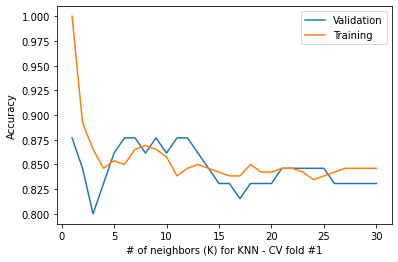

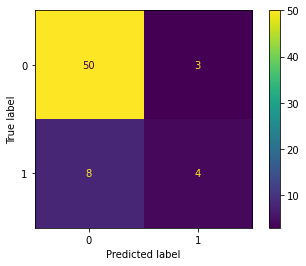

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        53
           1       0.57      0.33      0.42        12

    accuracy                           0.83        65
   macro avg       0.72      0.64      0.66        65
weighted avg       0.81      0.83      0.81        65



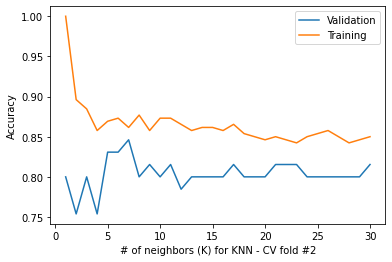

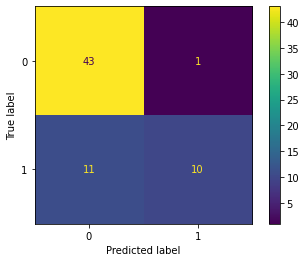

              precision    recall  f1-score   support

           0       0.80      0.98      0.88        44
           1       0.91      0.48      0.62        21

    accuracy                           0.82        65
   macro avg       0.85      0.73      0.75        65
weighted avg       0.83      0.82      0.80        65



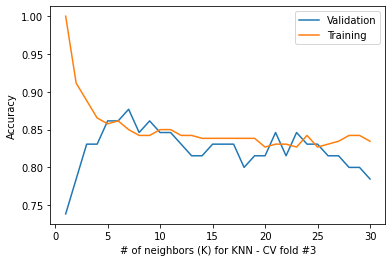

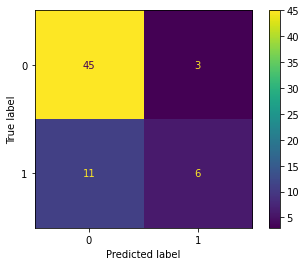

              precision    recall  f1-score   support

           0       0.80      0.94      0.87        48
           1       0.67      0.35      0.46        17

    accuracy                           0.78        65
   macro avg       0.74      0.65      0.66        65
weighted avg       0.77      0.78      0.76        65



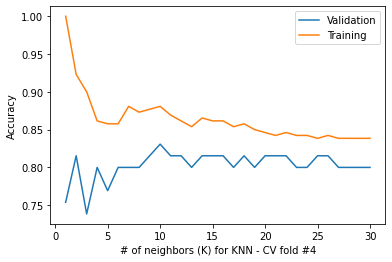

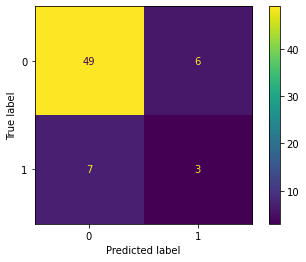

              precision    recall  f1-score   support

           0       0.88      0.89      0.88        55
           1       0.33      0.30      0.32        10

    accuracy                           0.80        65
   macro avg       0.60      0.60      0.60        65
weighted avg       0.79      0.80      0.80        65



In [28]:
knn_train_acc_mean_1p, knn_train_acc_var_1p, knn_valid_acc_mean_1p, knn_valid_acc_var_1p = \
k_fold_cross_validation('knn', 30, x_sample_data_1_percent, y_sample_data_1_percent, fold_num=5)

### 5% of whole training/validation data

In [29]:
sample_idx_5_percent = random.sample(range(x_train.shape[0]), int(x_train.shape[0] * 0.05))
x_sample_data_5_percent = x_train.copy()[sample_idx_5_percent,:]
y_sample_data_5_percent = y_train.copy()[sample_idx_5_percent]
x_sample_data_5_percent.shape

(1628, 105)

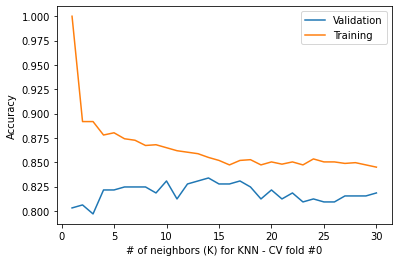

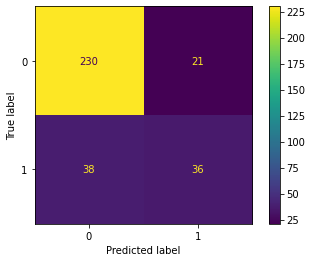

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       251
           1       0.63      0.49      0.55        74

    accuracy                           0.82       325
   macro avg       0.74      0.70      0.72       325
weighted avg       0.81      0.82      0.81       325



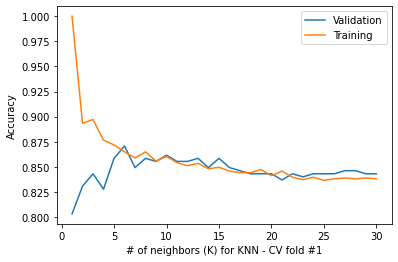

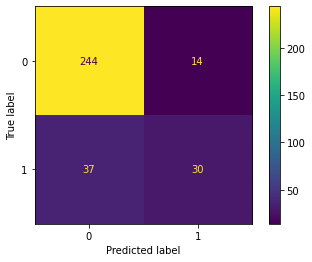

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       258
           1       0.68      0.45      0.54        67

    accuracy                           0.84       325
   macro avg       0.78      0.70      0.72       325
weighted avg       0.83      0.84      0.83       325



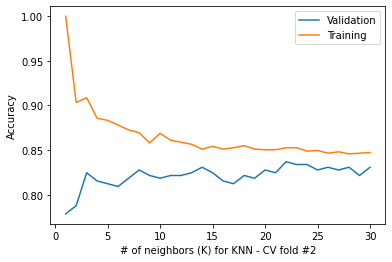

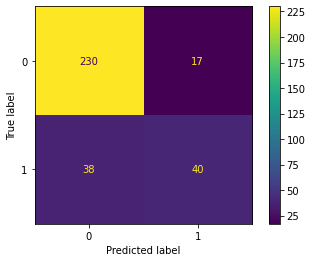

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       247
           1       0.70      0.51      0.59        78

    accuracy                           0.83       325
   macro avg       0.78      0.72      0.74       325
weighted avg       0.82      0.83      0.82       325



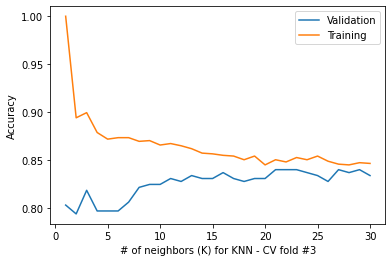

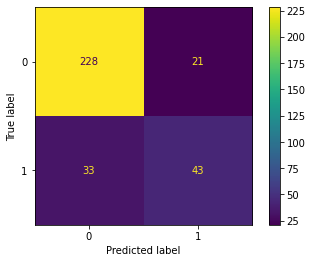

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       249
           1       0.67      0.57      0.61        76

    accuracy                           0.83       325
   macro avg       0.77      0.74      0.75       325
weighted avg       0.83      0.83      0.83       325



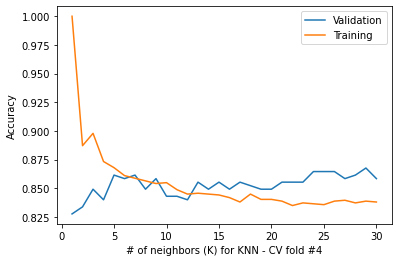

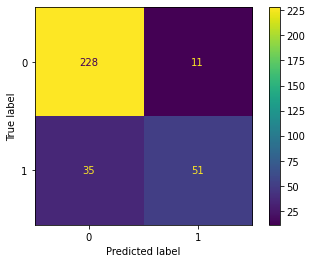

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       239
           1       0.82      0.59      0.69        86

    accuracy                           0.86       325
   macro avg       0.84      0.77      0.80       325
weighted avg       0.86      0.86      0.85       325



In [30]:
knn_train_acc_mean_5p, knn_train_acc_var_5p, knn_valid_acc_mean_5p, knn_valid_acc_var_5p = \
k_fold_cross_validation('knn', 30, x_sample_data_5_percent, y_sample_data_5_percent, fold_num=5)

### 15% of whole training/validation data

In [31]:
sample_idx_15_percent = random.sample(range(x_train.shape[0]), int(x_train.shape[0] * 0.15))
x_sample_data_15_percent = x_train.copy()[sample_idx_15_percent,:]
y_sample_data_15_percent = y_train.copy()[sample_idx_15_percent]
x_sample_data_15_percent.shape

(4884, 105)

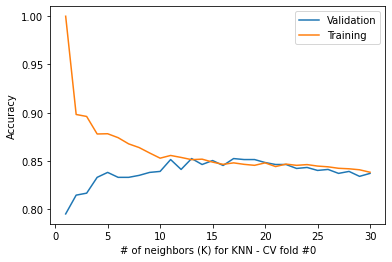

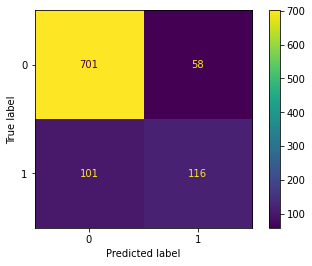

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       759
           1       0.67      0.53      0.59       217

    accuracy                           0.84       976
   macro avg       0.77      0.73      0.75       976
weighted avg       0.83      0.84      0.83       976



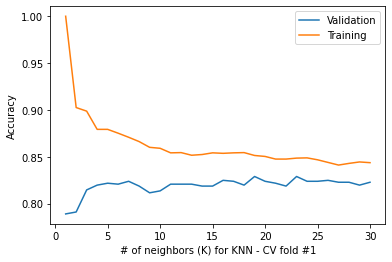

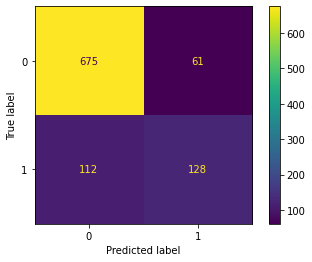

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       736
           1       0.68      0.53      0.60       240

    accuracy                           0.82       976
   macro avg       0.77      0.73      0.74       976
weighted avg       0.81      0.82      0.82       976



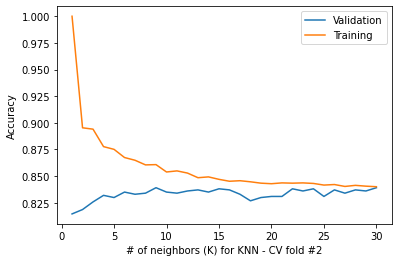

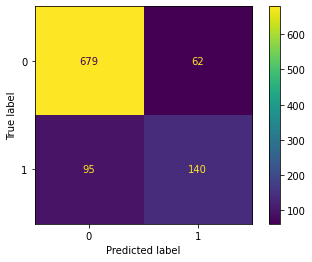

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       741
           1       0.69      0.60      0.64       235

    accuracy                           0.84       976
   macro avg       0.79      0.76      0.77       976
weighted avg       0.83      0.84      0.83       976



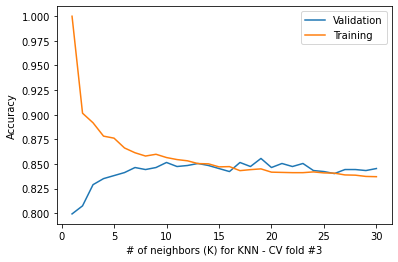

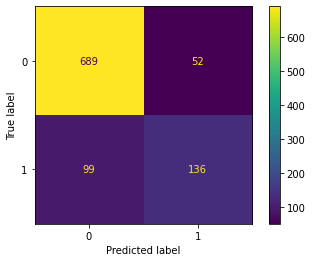

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       741
           1       0.72      0.58      0.64       235

    accuracy                           0.85       976
   macro avg       0.80      0.75      0.77       976
weighted avg       0.84      0.85      0.84       976



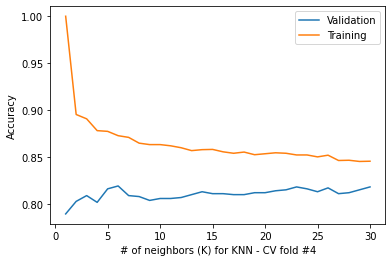

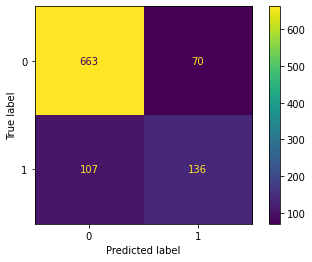

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       733
           1       0.66      0.56      0.61       243

    accuracy                           0.82       976
   macro avg       0.76      0.73      0.74       976
weighted avg       0.81      0.82      0.81       976



In [32]:
knn_train_acc_mean_15p, knn_train_acc_var_15p, knn_valid_acc_mean_15p, knn_valid_acc_var_15p = \
k_fold_cross_validation('knn', 30, x_sample_data_15_percent, y_sample_data_15_percent, fold_num=5)

### 30% of whole training/validation data

In [33]:
sample_idx_30_percent = random.sample(range(x_train.shape[0]), int(x_train.shape[0] * 0.3))
x_sample_data_30_percent = x_train.copy()[sample_idx_30_percent,:]
y_sample_data_30_percent = y_train.copy()[sample_idx_30_percent]
x_sample_data_30_percent.shape

(9768, 105)

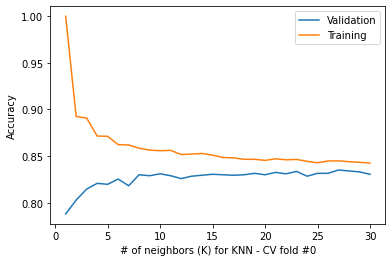

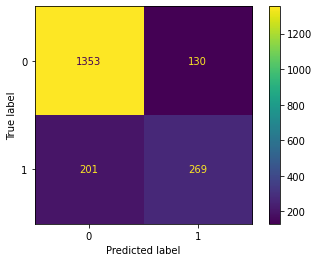

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1483
           1       0.67      0.57      0.62       470

    accuracy                           0.83      1953
   macro avg       0.77      0.74      0.76      1953
weighted avg       0.82      0.83      0.83      1953



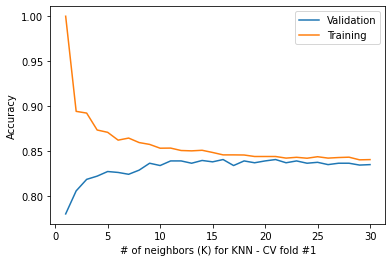

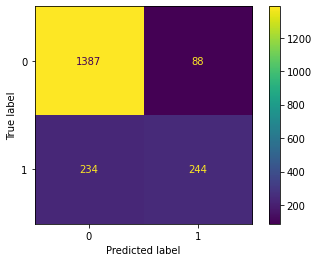

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1475
           1       0.73      0.51      0.60       478

    accuracy                           0.84      1953
   macro avg       0.80      0.73      0.75      1953
weighted avg       0.83      0.84      0.82      1953



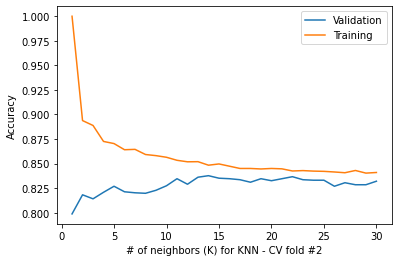

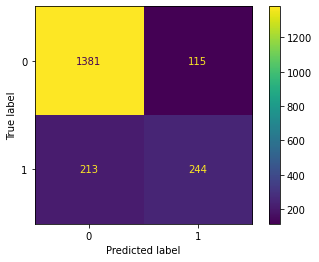

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1496
           1       0.68      0.53      0.60       457

    accuracy                           0.83      1953
   macro avg       0.77      0.73      0.75      1953
weighted avg       0.82      0.83      0.82      1953



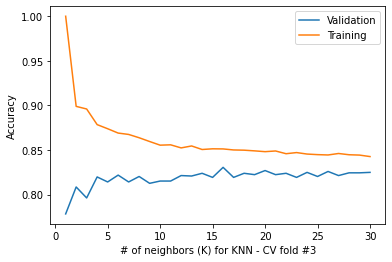

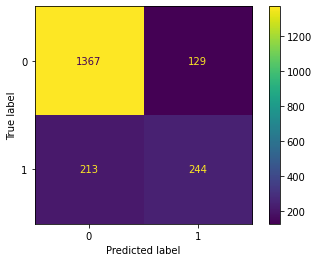

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1496
           1       0.65      0.53      0.59       457

    accuracy                           0.82      1953
   macro avg       0.76      0.72      0.74      1953
weighted avg       0.82      0.82      0.82      1953



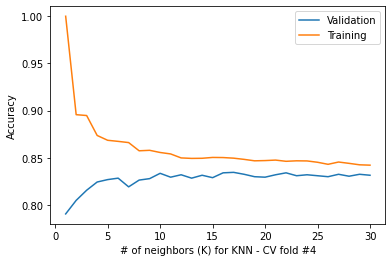

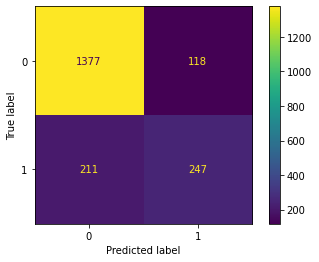

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1495
           1       0.68      0.54      0.60       458

    accuracy                           0.83      1953
   macro avg       0.77      0.73      0.75      1953
weighted avg       0.82      0.83      0.82      1953



In [34]:
knn_train_acc_mean_30p, knn_train_acc_var_30p, knn_valid_acc_mean_30p, knn_valid_acc_var_30p = \
k_fold_cross_validation('knn', 30, x_sample_data_30_percent, y_sample_data_30_percent, fold_num=5)

# Decision Tree Cross Validation for Adult Data

In [35]:
def decision_tree_CV(x_train, y_train, x_valid, y_valid, CV_num, max_depth):
  
  max_depth_range = range(1,max_depth+1)

  DT_valid_acc_list = np.zeros((1,max_depth))
  DT_train_acc_list = np.zeros((1,max_depth))
  for d in max_depth_range:
    DT = DecisionTreeClassifier(criterion="entropy", max_depth=d)
    DT.fit(x_train, y_train)
    DT_y_pred = DT.predict(x_valid)
    DT_valid_acc_list[0][d-1] = metrics.accuracy_score(y_valid, DT_y_pred)
    DT_train_acc_list[0][d-1] = metrics.accuracy_score(y_train, DT.predict(x_train))
    
  plt.plot(max_depth_range, DT_valid_acc_list.squeeze())
  plt.xlabel('Maximum depth (d) for Binary Decision Tree - CV fold #' + str(CV_num))
  plt.ylabel('Accuracy')
  plt.plot(max_depth_range, DT_train_acc_list.squeeze())
  plt.legend(['Validation', 'Training'])
  plt.show()

  plot_confusion_matrix(DT, x_valid, y_valid)
  plt.show()

  print(classification_report(y_valid, DT_y_pred))

  return [DT_train_acc_list, DT_valid_acc_list]

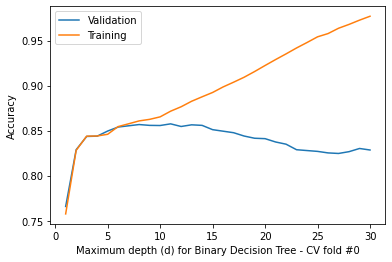

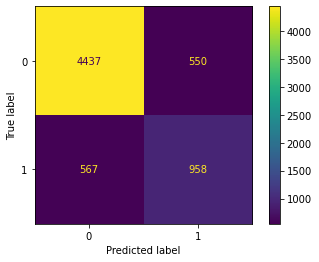

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      4987
           1       0.64      0.63      0.63      1525

    accuracy                           0.83      6512
   macro avg       0.76      0.76      0.76      6512
weighted avg       0.83      0.83      0.83      6512



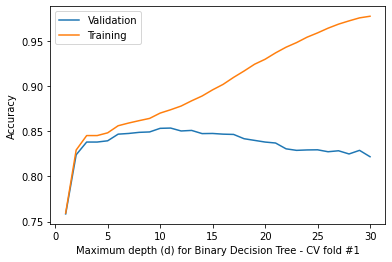

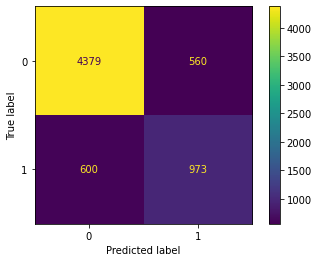

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      4939
           1       0.63      0.62      0.63      1573

    accuracy                           0.82      6512
   macro avg       0.76      0.75      0.75      6512
weighted avg       0.82      0.82      0.82      6512



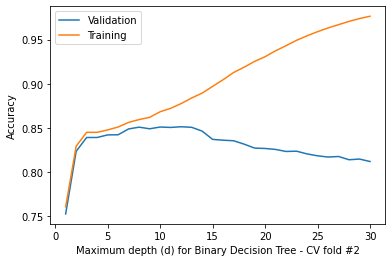

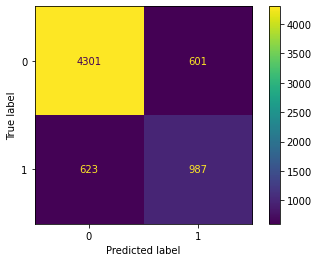

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      4902
           1       0.62      0.61      0.62      1610

    accuracy                           0.81      6512
   macro avg       0.75      0.75      0.75      6512
weighted avg       0.81      0.81      0.81      6512



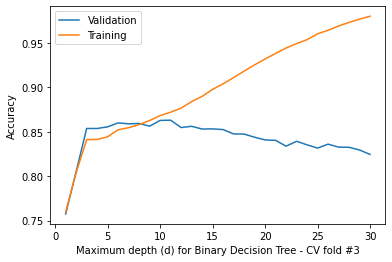

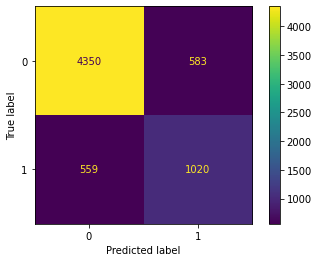

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      4933
           1       0.64      0.65      0.64      1579

    accuracy                           0.82      6512
   macro avg       0.76      0.76      0.76      6512
weighted avg       0.83      0.82      0.83      6512



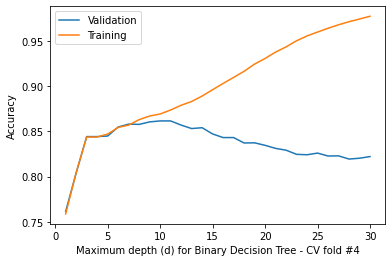

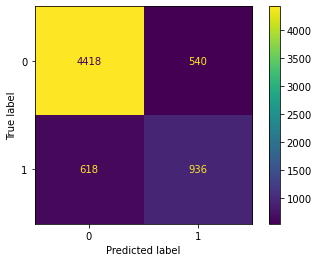

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      4958
           1       0.63      0.60      0.62      1554

    accuracy                           0.82      6512
   macro avg       0.76      0.75      0.75      6512
weighted avg       0.82      0.82      0.82      6512



In [36]:
dt_train_acc_mean, dt_train_acc_var, dt_valid_acc_mean, dt_valid_acc_var = k_fold_cross_validation('decision_tree', 30, x_train, y_train, fold_num=5)

In [37]:
print('Training accuracy mean of K-fold CV, for different values of hyperparameter (max_depth)\n', dt_train_acc_mean, '\n')
print('Training accuracy Variance of K-fold, CV for different values of hyperparameter (max_depth)\n', dt_train_acc_var, '\n')
print('Validation accuracy mean of K-fold CV, for different values of hyperparameter (max_depth)\n', dt_valid_acc_mean, '\n')
print('Validation accuracy Variance of K-fold, CV for different values of hyperparameter (max_depth)\n', dt_valid_acc_var, '\n')

Training accuracy mean of K-fold CV, for different values of hyperparameter (max_depth)
 [0.75919229 0.81905639 0.84385581 0.84394027 0.84671197 0.85371415
 0.8569542  0.86067795 0.86372605 0.86830205 0.87272448 0.87757687
 0.88351952 0.8890706  0.89588852 0.90248378 0.90945526 0.91598142
 0.92307574 0.92914123 0.93588238 0.94194019 0.94784445 0.95323429
 0.95854735 0.96277784 0.96736151 0.97116204 0.97475527 0.97776498] 

Training accuracy Variance of K-fold, CV for different values of hyperparameter (max_depth)
 [1.16566138e-06 1.46301645e-04 2.07300740e-06 1.87894665e-06
 1.94532344e-06 3.23194857e-06 2.22320995e-06 2.94592708e-06
 3.41398369e-06 2.82225167e-06 9.08171300e-07 8.31183651e-07
 3.36835701e-07 6.88880294e-07 3.61771211e-06 4.76863619e-06
 9.33495875e-06 1.21303296e-05 1.43413960e-05 1.23377128e-05
 1.26684178e-05 1.17182747e-05 9.76116143e-06 7.83399434e-06
 5.31332675e-06 6.71820397e-06 4.24457785e-06 3.59790518e-06
 2.47857786e-06 1.84004018e-06] 

Validation accuracy

Finding the best hyperparameter

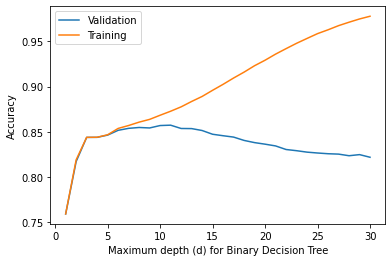

In [38]:
max_depth_range = range(1,len(dt_train_acc_mean)+1)
plt.plot(max_depth_range, dt_valid_acc_mean)
plt.xlabel('Maximum depth (d) for Binary Decision Tree')
plt.ylabel('Accuracy')
plt.plot(max_depth_range, dt_train_acc_mean)
plt.legend(['Validation', 'Training'])
plt.show()

The best value for max_depth is approximately 7. So, we pick **max_depth=7**.

# Sampling growing subsets of the training/validation data (DT - Adult data)

### 1% of whole training/validation data

In [39]:
sample_idx_1_percent = random.sample(range(x_train.shape[0]), int(x_train.shape[0] * 0.01))
x_sample_data_1_percent = x_train.copy()[sample_idx_1_percent,:]
y_sample_data_1_percent = y_train.copy()[sample_idx_1_percent]
x_sample_data_1_percent.shape

(325, 105)

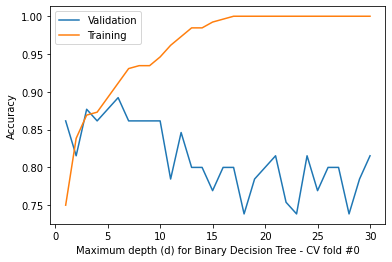

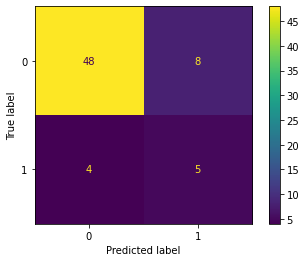

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        56
           1       0.38      0.56      0.45         9

    accuracy                           0.82        65
   macro avg       0.65      0.71      0.67        65
weighted avg       0.85      0.82      0.83        65



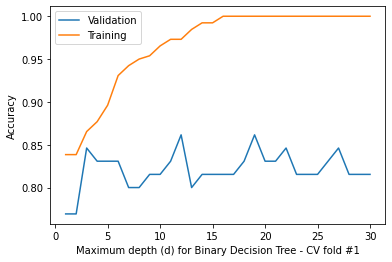

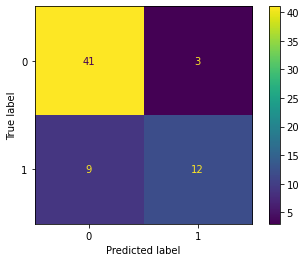

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        44
           1       0.80      0.57      0.67        21

    accuracy                           0.82        65
   macro avg       0.81      0.75      0.77        65
weighted avg       0.81      0.82      0.81        65



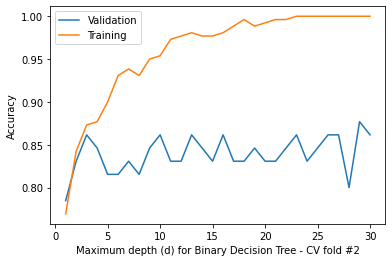

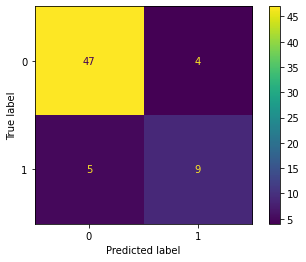

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        51
           1       0.69      0.64      0.67        14

    accuracy                           0.86        65
   macro avg       0.80      0.78      0.79        65
weighted avg       0.86      0.86      0.86        65



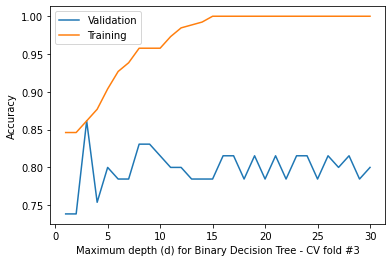

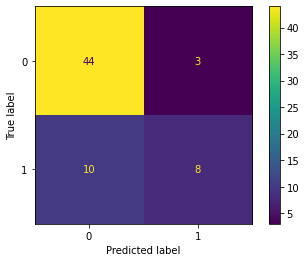

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        47
           1       0.73      0.44      0.55        18

    accuracy                           0.80        65
   macro avg       0.77      0.69      0.71        65
weighted avg       0.79      0.80      0.78        65



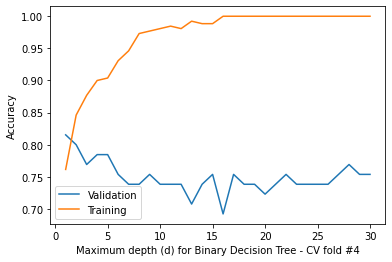

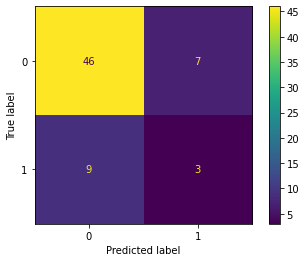

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        53
           1       0.30      0.25      0.27        12

    accuracy                           0.75        65
   macro avg       0.57      0.56      0.56        65
weighted avg       0.74      0.75      0.74        65



In [40]:
dt_train_acc_mean_1p, dt_train_acc_var_1p, dt_valid_acc_mean_1p, dt_valid_acc_var_1p = \
k_fold_cross_validation('decision_tree', 30, x_sample_data_1_percent, y_sample_data_1_percent, fold_num=5)

### 5% of whole training/validation data

In [41]:
sample_idx_5_percent = random.sample(range(x_train.shape[0]), int(x_train.shape[0] * 0.05))
x_sample_data_5_percent = x_train.copy()[sample_idx_5_percent,:]
y_sample_data_5_percent = y_train.copy()[sample_idx_5_percent]
x_sample_data_5_percent.shape

(1628, 105)

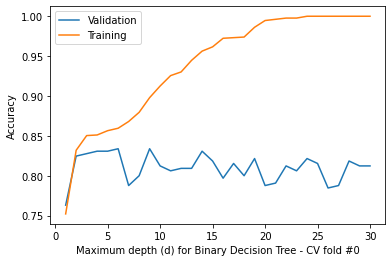

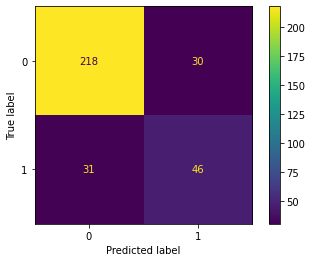

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       248
           1       0.61      0.60      0.60        77

    accuracy                           0.81       325
   macro avg       0.74      0.74      0.74       325
weighted avg       0.81      0.81      0.81       325



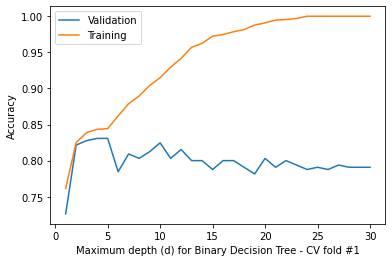

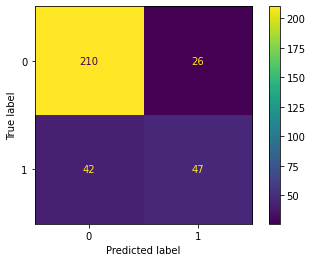

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       236
           1       0.64      0.53      0.58        89

    accuracy                           0.79       325
   macro avg       0.74      0.71      0.72       325
weighted avg       0.78      0.79      0.78       325



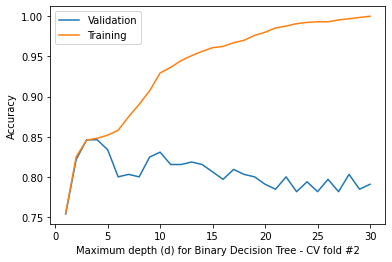

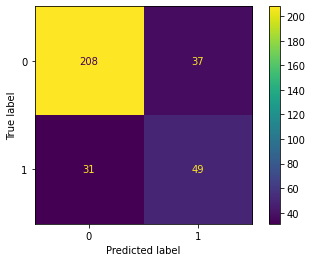

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       245
           1       0.57      0.61      0.59        80

    accuracy                           0.79       325
   macro avg       0.72      0.73      0.72       325
weighted avg       0.80      0.79      0.79       325



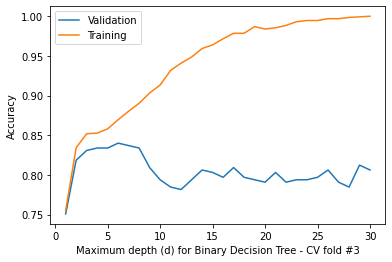

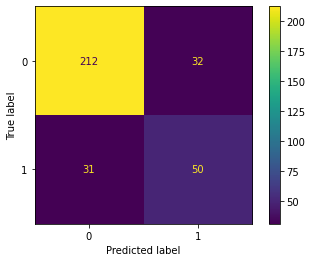

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       244
           1       0.61      0.62      0.61        81

    accuracy                           0.81       325
   macro avg       0.74      0.74      0.74       325
weighted avg       0.81      0.81      0.81       325



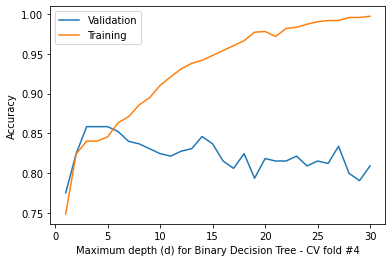

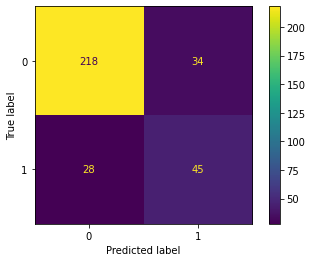

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       252
           1       0.57      0.62      0.59        73

    accuracy                           0.81       325
   macro avg       0.73      0.74      0.73       325
weighted avg       0.82      0.81      0.81       325



In [42]:
dt_train_acc_mean_5p, dt_train_acc_var_5p, dt_valid_acc_mean_5p, dt_valid_acc_var_5p = \
k_fold_cross_validation('decision_tree', 30, x_sample_data_5_percent, y_sample_data_5_percent, fold_num=5)

### 15% of whole training/validation data

In [43]:
sample_idx_15_percent = random.sample(range(x_train.shape[0]), int(x_train.shape[0] * 0.15))
x_sample_data_15_percent = x_train.copy()[sample_idx_15_percent,:]
y_sample_data_15_percent = y_train.copy()[sample_idx_15_percent]
x_sample_data_15_percent.shape

(4884, 105)

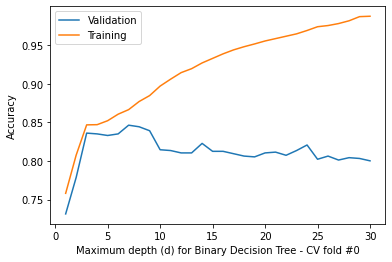

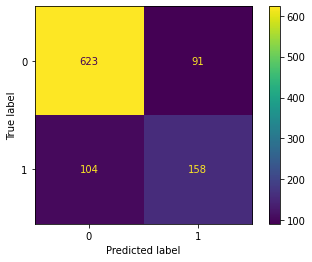

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       714
           1       0.63      0.60      0.62       262

    accuracy                           0.80       976
   macro avg       0.75      0.74      0.74       976
weighted avg       0.80      0.80      0.80       976



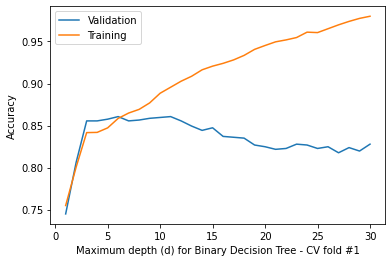

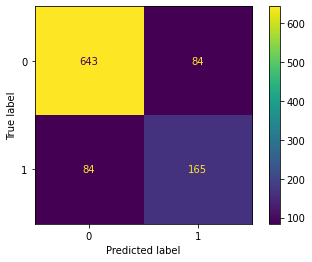

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       727
           1       0.66      0.66      0.66       249

    accuracy                           0.83       976
   macro avg       0.77      0.77      0.77       976
weighted avg       0.83      0.83      0.83       976



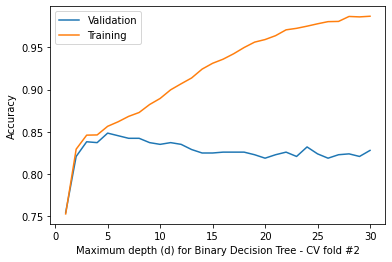

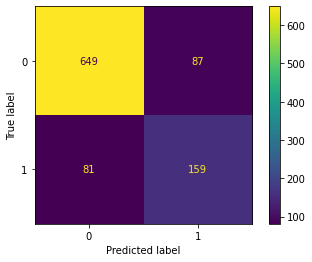

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       736
           1       0.65      0.66      0.65       240

    accuracy                           0.83       976
   macro avg       0.77      0.77      0.77       976
weighted avg       0.83      0.83      0.83       976



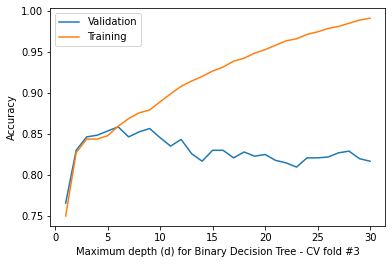

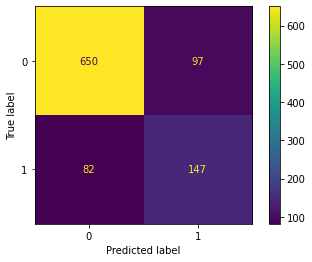

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       747
           1       0.60      0.64      0.62       229

    accuracy                           0.82       976
   macro avg       0.75      0.76      0.75       976
weighted avg       0.82      0.82      0.82       976



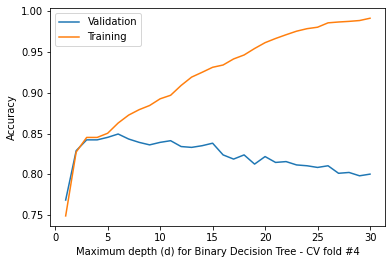

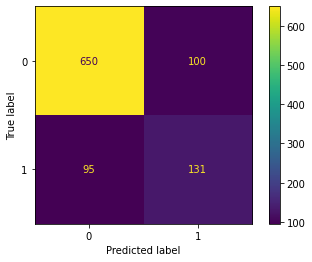

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       750
           1       0.57      0.58      0.57       226

    accuracy                           0.80       976
   macro avg       0.72      0.72      0.72       976
weighted avg       0.80      0.80      0.80       976



In [44]:
dt_train_acc_mean_15p, dt_train_acc_var_15p, dt_valid_acc_mean_15p, dt_valid_acc_var_15p = \
k_fold_cross_validation('decision_tree', 30, x_sample_data_15_percent, y_sample_data_15_percent, fold_num=5)

### 30% of whole training/validation data

In [45]:
sample_idx_30_percent = random.sample(range(x_train.shape[0]), int(x_train.shape[0] * 0.3))
x_sample_data_30_percent = x_train.copy()[sample_idx_30_percent,:]
y_sample_data_30_percent = y_train.copy()[sample_idx_30_percent]
x_sample_data_30_percent.shape

(9768, 105)

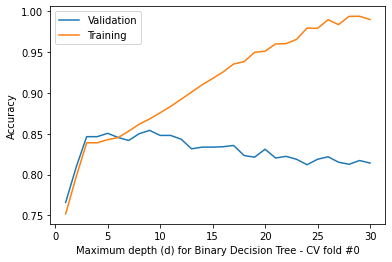

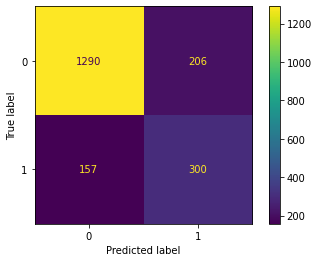

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      1496
           1       0.59      0.66      0.62       457

    accuracy                           0.81      1953
   macro avg       0.74      0.76      0.75      1953
weighted avg       0.82      0.81      0.82      1953



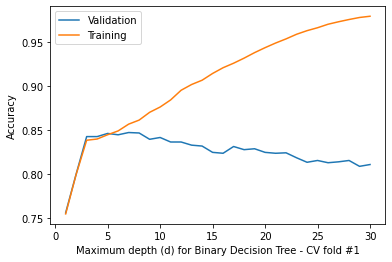

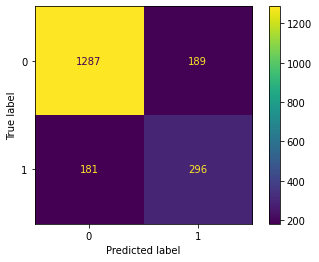

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1476
           1       0.61      0.62      0.62       477

    accuracy                           0.81      1953
   macro avg       0.74      0.75      0.74      1953
weighted avg       0.81      0.81      0.81      1953



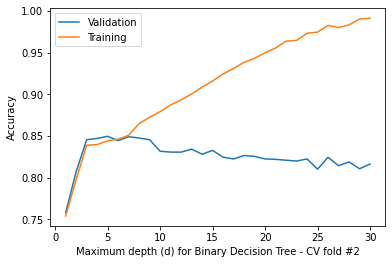

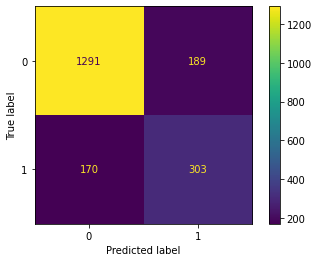

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1480
           1       0.62      0.64      0.63       473

    accuracy                           0.82      1953
   macro avg       0.75      0.76      0.75      1953
weighted avg       0.82      0.82      0.82      1953



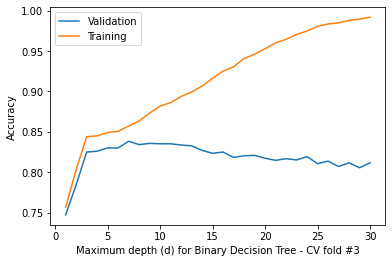

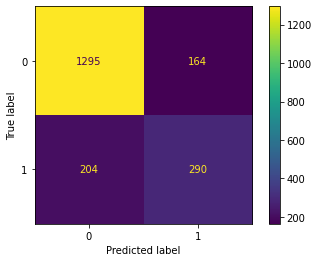

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1459
           1       0.64      0.59      0.61       494

    accuracy                           0.81      1953
   macro avg       0.75      0.74      0.74      1953
weighted avg       0.81      0.81      0.81      1953



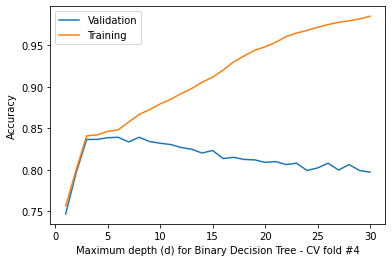

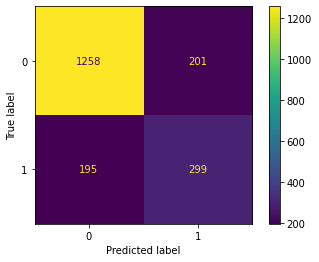

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1459
           1       0.60      0.61      0.60       494

    accuracy                           0.80      1953
   macro avg       0.73      0.73      0.73      1953
weighted avg       0.80      0.80      0.80      1953



In [46]:
dt_train_acc_mean_30p, dt_train_acc_var_30p, dt_valid_acc_mean_30p, dt_valid_acc_var_30p = \
k_fold_cross_validation('decision_tree', 30, x_sample_data_30_percent, y_sample_data_30_percent, fold_num=5)

# Best KNN model for Adult Data (Applying to the test data)

In [47]:
def knn_best(x_train, y_train, x_test, y_test, best_K):
  
  KNN = KNeighborsClassifier(n_neighbors=best_K)
  KNN.fit(x_train, y_train)
  KNN_y_pred = KNN.predict(x_test)
  KNN_test_acc = metrics.accuracy_score(y_test, KNN_y_pred)
  KNN_train_acc = metrics.accuracy_score(y_train, KNN.predict(x_train))

  plot_confusion_matrix(KNN, x_test, y_test)
  plt.show()

  print(classification_report(y_test, KNN_y_pred))

  return KNN_train_acc, KNN_test_acc

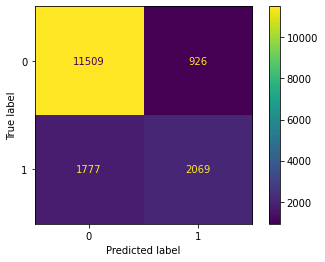

              precision    recall  f1-score   support

           0       0.87      0.93      0.89     12435
           1       0.69      0.54      0.60      3846

    accuracy                           0.83     16281
   macro avg       0.78      0.73      0.75     16281
weighted avg       0.82      0.83      0.83     16281



In [49]:
knn_train_acc_final, knn_test_acc = knn_best(x_train, y_train, x_test, y_test, 12)

In [53]:
print('Training accuracy, for the KNN model with the best hyperparameter (12 neighbors): %', 100*knn_train_acc_final, '\n')
print('Testing accuracy, for the KNN model with the best hyperparameter (12 neighbors): %', 100*knn_test_acc, '\n')

Training accuracy, for the KNN model with the best hyperparameter (12 neighbors): % 85.50105954976813 

Testing accuracy, for the KNN model with the best hyperparameter (12 neighbors): % 83.3978256863829 



# Best DT model for Adult Data (Applying to the test data)

In [52]:
def decision_tree_best(x_train, y_train, x_test, y_test, best_depth):
  
  DT = DecisionTreeClassifier(criterion="entropy", max_depth=best_depth)
  DT.fit(x_train, y_train)
  DT_y_pred = DT.predict(x_test)
  DT_test_acc = metrics.accuracy_score(y_test, DT_y_pred)
  DT_train_acc = metrics.accuracy_score(y_train, DT.predict(x_train))

  plot_confusion_matrix(DT, x_test, y_test)
  plt.show()

  print(classification_report(y_test, DT_y_pred))

  return DT_train_acc, DT_test_acc

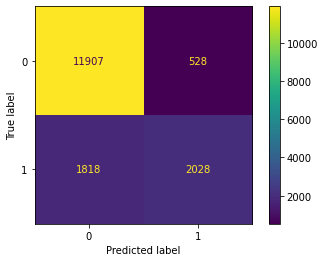

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     12435
           1       0.79      0.53      0.63      3846

    accuracy                           0.86     16281
   macro avg       0.83      0.74      0.77     16281
weighted avg       0.85      0.86      0.84     16281



In [54]:
DT_train_acc_final, DT_test_acc = decision_tree_best(x_train, y_train, x_test, y_test, 7)

In [56]:
print('Training accuracy, for the Binary Decision Tree model with the best hyperparameter (max_depth=7): %', 100*DT_train_acc_final, '\n')
print('Testing accuracy, for the Binary Decision Tree model with the best hyperparameter (max_depth=7): %', 100*DT_test_acc, '\n')

Training accuracy, for the Binary Decision Tree model with the best hyperparameter (max_depth=7): % 85.68840023340807 

Testing accuracy, for the Binary Decision Tree model with the best hyperparameter (max_depth=7): % 85.59056569006817 





---



# Bank Data Preprocessing

### Train/Test Split

In [57]:
df_bank = pd.read_csv('bank/bank-full.csv', delimiter=";")
features_names_bank = df_bank.columns.to_list()
features_names_bank.remove('y')
features_names_bank

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [58]:
categorical_features_names_bank = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
continous_features_names_bank = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
label_name_bank = ['y']

In [59]:
df_bank.shape

(45211, 17)

In [60]:
indices = np.array([False] * df_bank.shape[0])
idx = random.sample(range(df_bank.shape[0]), int(df_bank.shape[0] * 0.3))
indices[idx] = True
test_bank = df_bank.iloc[indices].reset_index(drop=True)
train_bank = df_bank.iloc[~indices].reset_index(drop=True)
test_size_bank = test_bank.shape[0]
train_size_bank = train_bank.shape[0]

In [61]:
train_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
1,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
2,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
3,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
4,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31643,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
31644,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
31645,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
31646,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [62]:
test_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
2,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
3,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
4,51,retired,married,primary,no,229,yes,no,unknown,5,may,353,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13558,34,technician,married,secondary,no,133,no,no,cellular,15,nov,401,2,187,5,success,yes
13559,29,management,single,secondary,no,703,yes,no,cellular,16,nov,236,1,550,2,success,yes
13560,29,management,single,tertiary,no,765,no,no,cellular,16,nov,238,1,-1,0,unknown,yes
13561,36,management,single,secondary,no,1511,yes,no,cellular,16,nov,270,1,-1,0,unknown,yes


### Feature Scaling

In [63]:
scaler = MinMaxScaler()
scaler.fit(train_bank[continous_features_names_bank])
train_bank[continous_features_names_bank] = scaler.transform(train_bank[continous_features_names_bank])
test_bank[continous_features_names_bank] = scaler.transform(test_bank[continous_features_names_bank])

In [64]:
train_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.337662,technician,single,secondary,no,0.073067,yes,no,unknown,0.133333,may,0.030704,0.0,0.0,0.0,unknown,no
1,0.220779,management,married,tertiary,no,0.074901,yes,no,unknown,0.133333,may,0.028264,0.0,0.0,0.0,unknown,no
2,0.129870,management,single,tertiary,no,0.076862,yes,yes,unknown,0.133333,may,0.044124,0.0,0.0,0.0,unknown,no
3,0.311688,entrepreneur,divorced,tertiary,yes,0.072822,yes,no,unknown,0.133333,may,0.077267,0.0,0.0,0.0,unknown,no
4,0.519481,retired,married,primary,no,0.073902,yes,no,unknown,0.133333,may,0.010167,0.0,0.0,0.0,unknown,no


In [65]:
test_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.519481,management,married,tertiary,no,0.092259,yes,no,unknown,0.133333,may,0.053070,0.0,0.0,0.0,unknown,no
1,0.194805,entrepreneur,married,secondary,no,0.072822,yes,yes,unknown,0.133333,may,0.015453,0.0,0.0,0.0,unknown,no
2,0.376623,blue-collar,married,unknown,no,0.086476,yes,no,unknown,0.133333,may,0.018707,0.0,0.0,0.0,unknown,no
3,0.194805,unknown,single,unknown,no,0.072812,no,no,unknown,0.133333,may,0.040260,0.0,0.0,0.0,unknown,no
4,0.428571,retired,married,primary,no,0.074882,yes,no,unknown,0.133333,may,0.071777,0.0,0.0,0.0,unknown,no


### One-hot Encoding

In [66]:
temp_df = pd.concat([train_bank, test_bank], ignore_index=True)
temp_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.337662,technician,single,secondary,no,0.073067,yes,no,unknown,0.133333,may,0.030704,0.000000,0.000000,0.000000,unknown,no
1,0.220779,management,married,tertiary,no,0.074901,yes,no,unknown,0.133333,may,0.028264,0.000000,0.000000,0.000000,unknown,no
2,0.129870,management,single,tertiary,no,0.076862,yes,yes,unknown,0.133333,may,0.044124,0.000000,0.000000,0.000000,unknown,no
3,0.311688,entrepreneur,divorced,tertiary,yes,0.072822,yes,no,unknown,0.133333,may,0.077267,0.000000,0.000000,0.000000,unknown,no
4,0.519481,retired,married,primary,no,0.073902,yes,no,unknown,0.133333,may,0.010167,0.000000,0.000000,0.000000,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.207792,technician,married,secondary,no,0.074011,no,no,cellular,0.466667,nov,0.081537,0.017544,0.220917,0.018182,success,yes
45207,0.142857,management,single,secondary,no,0.079186,yes,no,cellular,0.500000,nov,0.047987,0.000000,0.647474,0.007273,success,yes
45208,0.142857,management,single,tertiary,no,0.079749,no,no,cellular,0.500000,nov,0.048394,0.000000,0.000000,0.000000,unknown,yes
45209,0.233766,management,single,secondary,no,0.086522,yes,no,cellular,0.500000,nov,0.054900,0.000000,0.000000,0.000000,unknown,yes


In [67]:
onehot_encoded_data_bank = pd.get_dummies(temp_df, columns=categorical_features_names_bank)
onehot_encoded_data_bank['y'] = onehot_encoded_data_bank['y'].replace({"yes" : 1, "no" : 0})
onehot_encoded_data_bank.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.337662,0.073067,0.133333,0.030704,0.0,0.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.220779,0.074901,0.133333,0.028264,0.0,0.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0.129870,0.076862,0.133333,0.044124,0.0,0.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0.311688,0.072822,0.133333,0.077267,0.0,0.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0.519481,0.073902,0.133333,0.010167,0.0,0.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


### Data Shuffling

In [68]:
train_data_bank = onehot_encoded_data_bank.loc[:train_size_bank-1]
test_data_bank = onehot_encoded_data_bank.loc[train_size_bank:]
train_data_bank

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.337662,0.073067,0.133333,0.030704,0.000000,0.000000,0.000000,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.220779,0.074901,0.133333,0.028264,0.000000,0.000000,0.000000,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0.129870,0.076862,0.133333,0.044124,0.000000,0.000000,0.000000,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0.311688,0.072822,0.133333,0.077267,0.000000,0.000000,0.000000,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0.519481,0.073902,0.133333,0.010167,0.000000,0.000000,0.000000,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31643,0.090909,0.077388,0.533333,0.078487,0.017544,0.000000,0.000000,1,0,0,...,0,0,0,1,0,0,0,0,0,1
31644,0.688312,0.088501,0.533333,0.092721,0.017544,0.000000,0.000000,1,0,0,...,0,0,0,1,0,0,0,0,0,1
31645,0.701299,0.124689,0.533333,0.229158,0.070175,0.217391,0.010909,1,0,0,...,0,0,0,1,0,0,0,0,1,0
31646,0.506494,0.078868,0.533333,0.103294,0.052632,0.000000,0.000000,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [69]:
test_data_bank

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
31648,0.519481,0.092259,0.133333,0.053070,0.000000,0.000000,0.000000,0,0,0,...,0,0,1,0,0,0,0,0,0,1
31649,0.194805,0.072822,0.133333,0.015453,0.000000,0.000000,0.000000,0,0,0,...,0,0,1,0,0,0,0,0,0,1
31650,0.376623,0.086476,0.133333,0.018707,0.000000,0.000000,0.000000,0,0,1,...,0,0,1,0,0,0,0,0,0,1
31651,0.194805,0.072812,0.133333,0.040260,0.000000,0.000000,0.000000,0,0,0,...,0,0,1,0,0,0,0,0,0,1
31652,0.428571,0.074882,0.133333,0.071777,0.000000,0.000000,0.000000,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.207792,0.074011,0.466667,0.081537,0.017544,0.220917,0.018182,1,0,0,...,0,0,0,1,0,0,0,0,1,0
45207,0.142857,0.079186,0.500000,0.047987,0.000000,0.647474,0.007273,1,0,0,...,0,0,0,1,0,0,0,0,1,0
45208,0.142857,0.079749,0.500000,0.048394,0.000000,0.000000,0.000000,1,0,0,...,0,0,0,1,0,0,0,0,0,1
45209,0.233766,0.086522,0.500000,0.054900,0.000000,0.000000,0.000000,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [70]:
shuffled_train_data_bank = train_data_bank.sample(frac=1).reset_index(drop=True)
shuffled_test_data_bank = test_data_bank.sample(frac=1).reset_index(drop=True)
shuffled_train_data_bank.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.428571,0.074556,0.400000,0.041074,0.035088,0.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.480519,0.078823,0.166667,0.046767,0.000000,0.0,0.0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0.259740,0.084679,0.033333,0.127288,0.000000,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.532468,0.073303,0.200000,0.002643,0.333333,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0.103896,0.072803,0.466667,0.008337,0.017544,0.0,0.0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


# K-fold Cross Validation for Bank Data

In [71]:
x_train = np.array(shuffled_train_data_bank[shuffled_train_data_bank.columns.difference(label_name_bank)])
y_train = np.array(shuffled_train_data_bank[label_name_bank]).astype('uint8').squeeze()
x_test = np.array(shuffled_test_data_bank[shuffled_test_data_bank.columns.difference(label_name_bank)])
y_test = np.array(shuffled_test_data_bank[label_name_bank]).astype('uint8').squeeze()

In [72]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(31648, 51)
(31648,)
(13563, 51)
(13563,)


# KNN Cross Validation for Bank Data

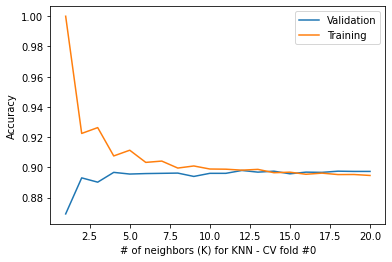

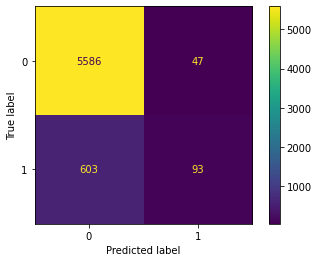

              precision    recall  f1-score   support

           0       0.90      0.99      0.95      5633
           1       0.66      0.13      0.22       696

    accuracy                           0.90      6329
   macro avg       0.78      0.56      0.58      6329
weighted avg       0.88      0.90      0.87      6329



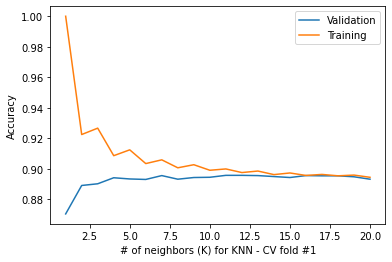

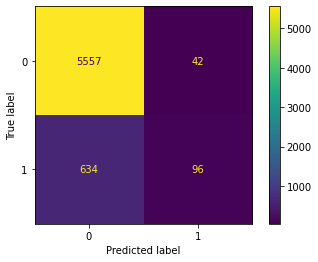

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      5599
           1       0.70      0.13      0.22       730

    accuracy                           0.89      6329
   macro avg       0.80      0.56      0.58      6329
weighted avg       0.87      0.89      0.86      6329



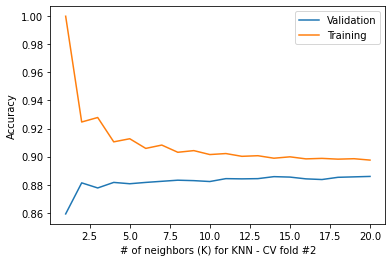

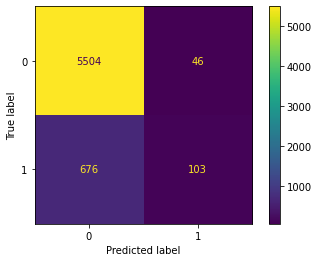

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      5550
           1       0.69      0.13      0.22       779

    accuracy                           0.89      6329
   macro avg       0.79      0.56      0.58      6329
weighted avg       0.87      0.89      0.85      6329



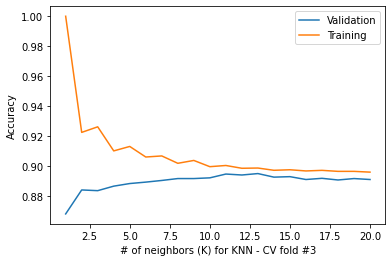

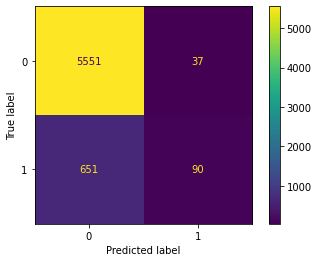

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      5588
           1       0.71      0.12      0.21       741

    accuracy                           0.89      6329
   macro avg       0.80      0.56      0.57      6329
weighted avg       0.87      0.89      0.86      6329



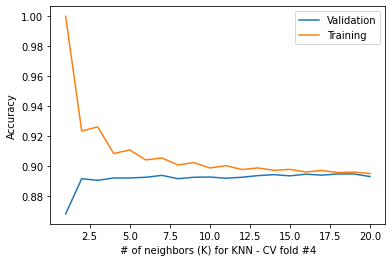

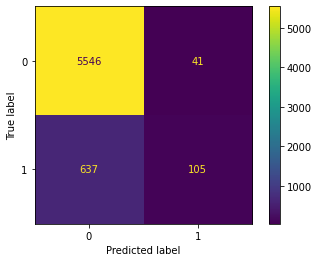

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      5587
           1       0.72      0.14      0.24       742

    accuracy                           0.89      6329
   macro avg       0.81      0.57      0.59      6329
weighted avg       0.88      0.89      0.86      6329



In [73]:
knn_train_acc_mean, knn_train_acc_var, knn_valid_acc_mean, knn_valid_acc_var = k_fold_cross_validation('knn', 20, x_train, y_train, fold_num=5)

In [74]:
print('Training accuracy mean of K-fold CV, for different values of hyperparameter (K neighbors)\n', knn_train_acc_mean, '\n')
print('Training accuracy Variance of K-fold, CV for different values of hyperparameter (K neighbors)\n', knn_train_acc_var, '\n')
print('Validation accuracy mean of K-fold CV, for different values of hyperparameter (K neighbors)\n', knn_valid_acc_mean, '\n')
print('Validation accuracy Variance of K-fold, CV for different values of hyperparameter (K neighbors)\n', knn_valid_acc_var, '\n')

Training accuracy mean of K-fold CV, for different values of hyperparameter (K neighbors)
 [1.         0.92310913 0.92665587 0.90905644 0.91209763 0.90456969
 0.90611794 0.90121253 0.90281607 0.89957739 0.90033572 0.89845571
 0.89907974 0.89720763 0.89787906 0.8964809  0.89711284 0.89622023
 0.89644931 0.895533  ] 

Training accuracy Variance of K-fold, CV for different values of hyperparameter (K neighbors)
 [0.00000000e+00 7.14700478e-07 4.10575270e-07 1.40306923e-06
 9.31968425e-07 1.58888886e-06 1.97675145e-06 1.56892167e-06
 1.52287235e-06 1.08671412e-06 1.24894751e-06 9.87751752e-07
 6.47935198e-07 8.98273798e-07 1.11791285e-06 1.22798196e-06
 8.77932227e-07 1.27390649e-06 1.30373248e-06 1.40144690e-06] 

Validation accuracy mean of K-fold CV, for different values of hyperparameter (K neighbors)
 [0.86702481 0.88784958 0.88645916 0.89025122 0.89003002 0.89050403
 0.89167325 0.89119924 0.89110444 0.89154685 0.89255807 0.89290567
 0.89309528 0.89303207 0.89240006 0.89246326 0.89233

Finding the best hyperparameter

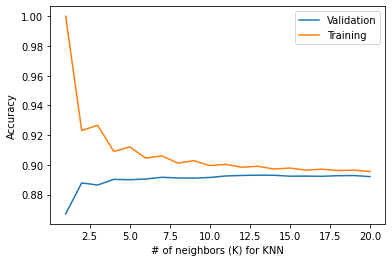

In [75]:
K_range = range(1,len(knn_train_acc_mean)+1)
plt.plot(K_range, knn_valid_acc_mean)
plt.xlabel('# of neighbors (K) for KNN')
plt.ylabel('Accuracy')
plt.plot(K_range, knn_train_acc_mean)
plt.legend(['Validation', 'Training'])
plt.show()

The best value for K is approximately 6. So, we pick **K=6**.

# Sampling growing subsets of the training/validation data (KNN - Bank data)

### 1% of whole training/validation data

In [76]:
sample_idx_1_percent = random.sample(range(x_train.shape[0]), int(x_train.shape[0] * 0.01))
x_sample_data_1_percent = x_train.copy()[sample_idx_1_percent,:]
y_sample_data_1_percent = y_train.copy()[sample_idx_1_percent]
x_sample_data_1_percent.shape

(316, 51)

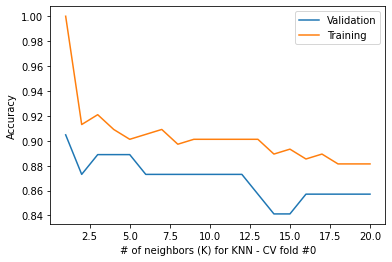

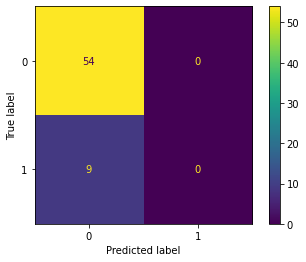

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        54
           1       0.00      0.00      0.00         9

    accuracy                           0.86        63
   macro avg       0.43      0.50      0.46        63
weighted avg       0.73      0.86      0.79        63



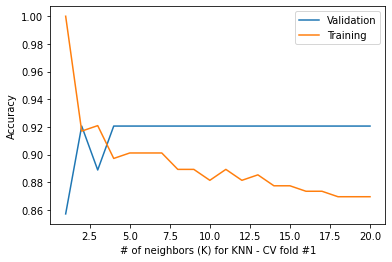

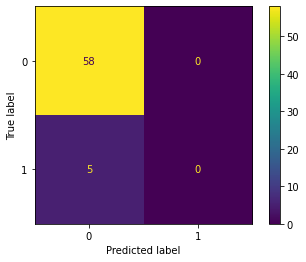

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        58
           1       0.00      0.00      0.00         5

    accuracy                           0.92        63
   macro avg       0.46      0.50      0.48        63
weighted avg       0.85      0.92      0.88        63



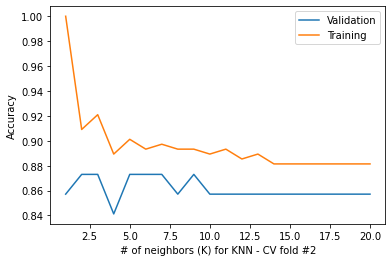

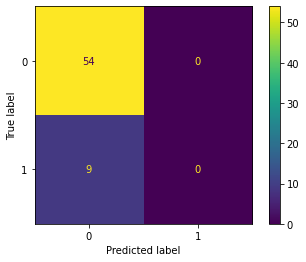

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        54
           1       0.00      0.00      0.00         9

    accuracy                           0.86        63
   macro avg       0.43      0.50      0.46        63
weighted avg       0.73      0.86      0.79        63



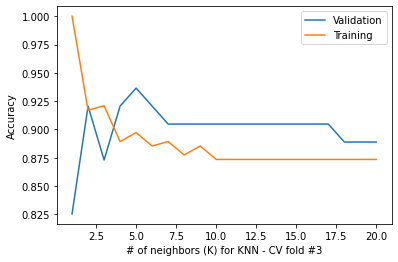

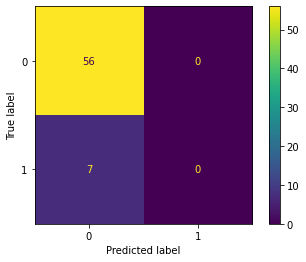

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        56
           1       0.00      0.00      0.00         7

    accuracy                           0.89        63
   macro avg       0.44      0.50      0.47        63
weighted avg       0.79      0.89      0.84        63



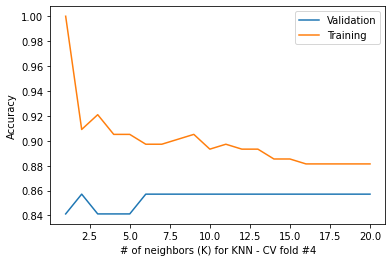

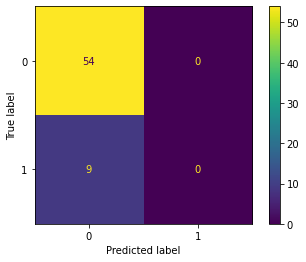

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        54
           1       0.00      0.00      0.00         9

    accuracy                           0.86        63
   macro avg       0.43      0.50      0.46        63
weighted avg       0.73      0.86      0.79        63



In [77]:
knn_train_acc_mean_1p, knn_train_acc_var_1p, knn_valid_acc_mean_1p, knn_valid_acc_var_1p = \
k_fold_cross_validation('knn', 20, x_sample_data_1_percent, y_sample_data_1_percent, fold_num=5)

### 5% of whole training/validation data

In [78]:
sample_idx_5_percent = random.sample(range(x_train.shape[0]), int(x_train.shape[0] * 0.05))
x_sample_data_5_percent = x_train.copy()[sample_idx_5_percent,:]
y_sample_data_5_percent = y_train.copy()[sample_idx_5_percent]
x_sample_data_5_percent.shape

(1582, 51)

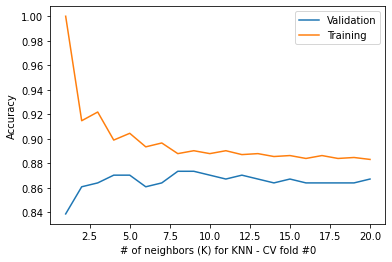

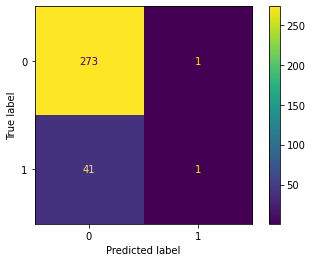

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       274
           1       0.50      0.02      0.05        42

    accuracy                           0.87       316
   macro avg       0.68      0.51      0.49       316
weighted avg       0.82      0.87      0.81       316



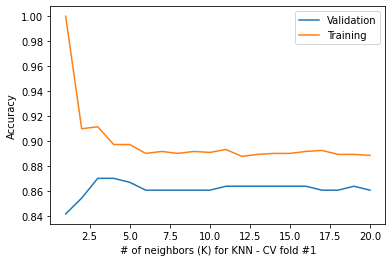

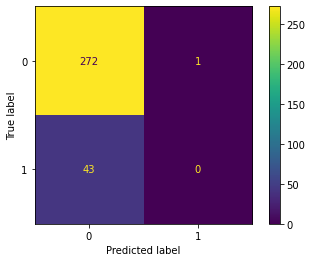

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       273
           1       0.00      0.00      0.00        43

    accuracy                           0.86       316
   macro avg       0.43      0.50      0.46       316
weighted avg       0.75      0.86      0.80       316



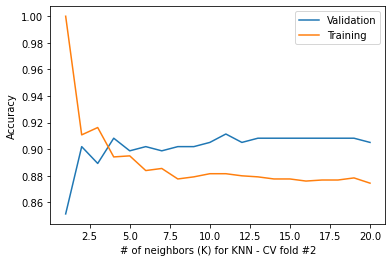

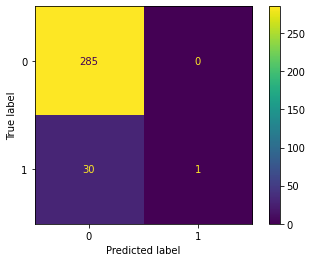

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       285
           1       1.00      0.03      0.06        31

    accuracy                           0.91       316
   macro avg       0.95      0.52      0.51       316
weighted avg       0.91      0.91      0.86       316



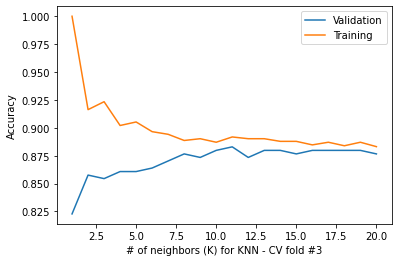

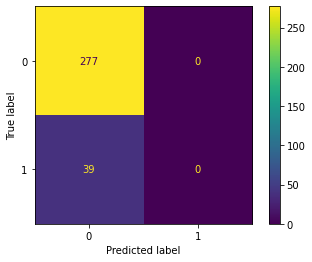

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       277
           1       0.00      0.00      0.00        39

    accuracy                           0.88       316
   macro avg       0.44      0.50      0.47       316
weighted avg       0.77      0.88      0.82       316



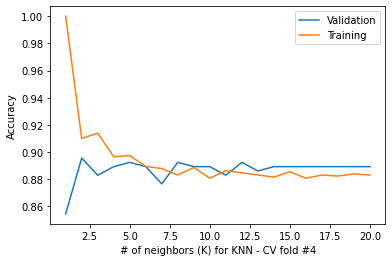

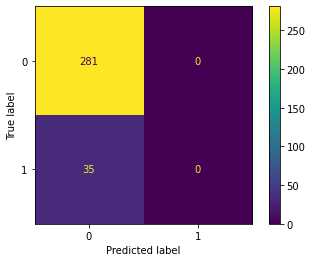

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       281
           1       0.00      0.00      0.00        35

    accuracy                           0.89       316
   macro avg       0.44      0.50      0.47       316
weighted avg       0.79      0.89      0.84       316



In [79]:
knn_train_acc_mean_5p, knn_train_acc_var_5p, knn_valid_acc_mean_5p, knn_valid_acc_var_5p = \
k_fold_cross_validation('knn', 20, x_sample_data_5_percent, y_sample_data_5_percent, fold_num=5)

### 15% of whole training/validation data

In [80]:
sample_idx_15_percent = random.sample(range(x_train.shape[0]), int(x_train.shape[0] * 0.15))
x_sample_data_15_percent = x_train.copy()[sample_idx_15_percent,:]
y_sample_data_15_percent = y_train.copy()[sample_idx_15_percent]
x_sample_data_15_percent.shape

(4747, 51)

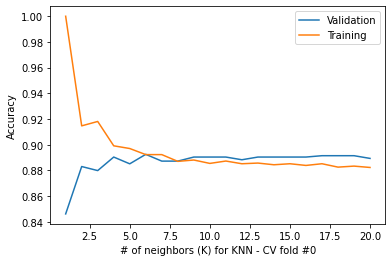

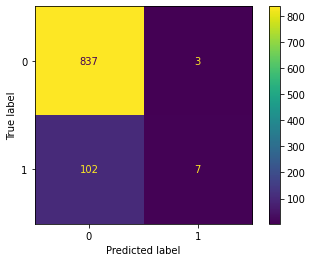

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       840
           1       0.70      0.06      0.12       109

    accuracy                           0.89       949
   macro avg       0.80      0.53      0.53       949
weighted avg       0.87      0.89      0.85       949



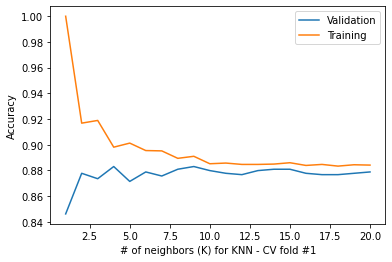

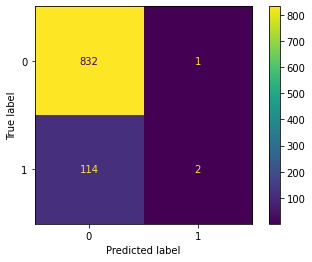

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       833
           1       0.67      0.02      0.03       116

    accuracy                           0.88       949
   macro avg       0.77      0.51      0.48       949
weighted avg       0.85      0.88      0.83       949



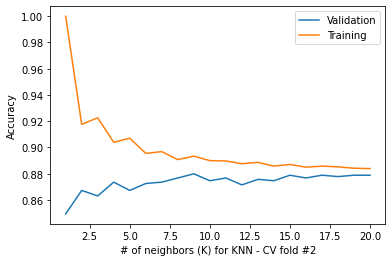

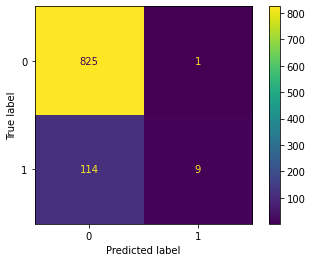

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       826
           1       0.90      0.07      0.14       123

    accuracy                           0.88       949
   macro avg       0.89      0.54      0.54       949
weighted avg       0.88      0.88      0.83       949



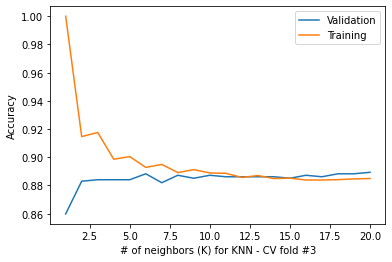

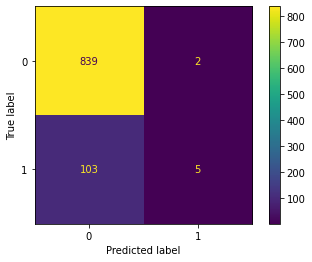

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       841
           1       0.71      0.05      0.09       108

    accuracy                           0.89       949
   macro avg       0.80      0.52      0.51       949
weighted avg       0.87      0.89      0.84       949



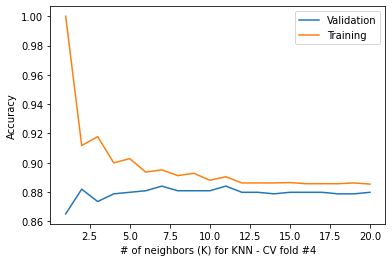

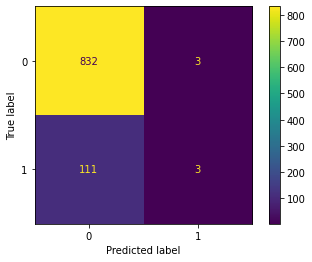

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       835
           1       0.50      0.03      0.05       114

    accuracy                           0.88       949
   macro avg       0.69      0.51      0.49       949
weighted avg       0.84      0.88      0.83       949



In [81]:
knn_train_acc_mean_15p, knn_train_acc_var_15p, knn_valid_acc_mean_15p, knn_valid_acc_var_15p = \
k_fold_cross_validation('knn', 20, x_sample_data_15_percent, y_sample_data_15_percent, fold_num=5)

### 30% of whole training/validation data

In [82]:
sample_idx_30_percent = random.sample(range(x_train.shape[0]), int(x_train.shape[0] * 0.3))
x_sample_data_30_percent = x_train.copy()[sample_idx_30_percent,:]
y_sample_data_30_percent = y_train.copy()[sample_idx_30_percent]
x_sample_data_30_percent.shape

(9494, 51)

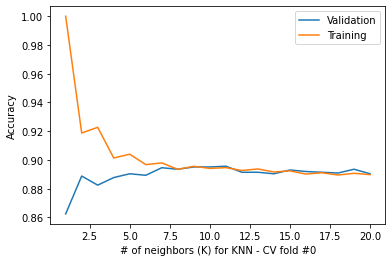

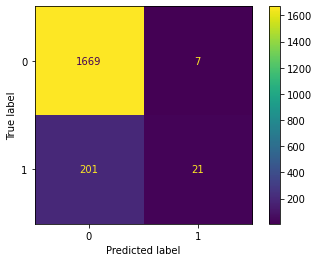

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1676
           1       0.75      0.09      0.17       222

    accuracy                           0.89      1898
   macro avg       0.82      0.55      0.55      1898
weighted avg       0.88      0.89      0.85      1898



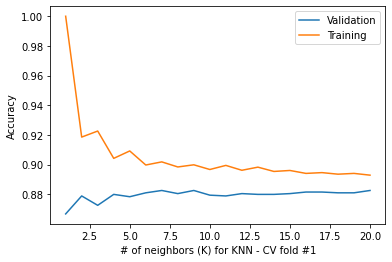

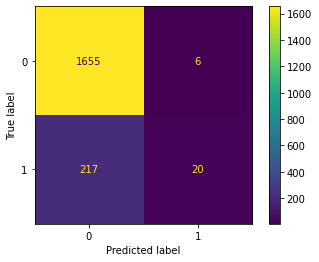

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1661
           1       0.77      0.08      0.15       237

    accuracy                           0.88      1898
   macro avg       0.83      0.54      0.54      1898
weighted avg       0.87      0.88      0.84      1898



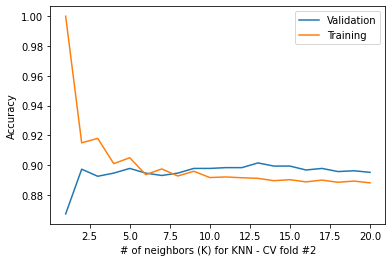

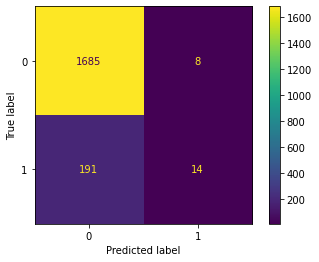

              precision    recall  f1-score   support

           0       0.90      1.00      0.94      1693
           1       0.64      0.07      0.12       205

    accuracy                           0.90      1898
   macro avg       0.77      0.53      0.53      1898
weighted avg       0.87      0.90      0.86      1898



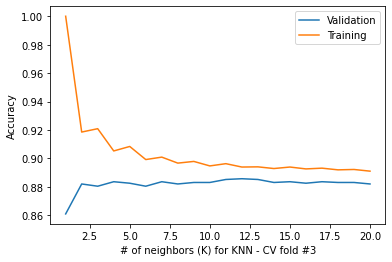

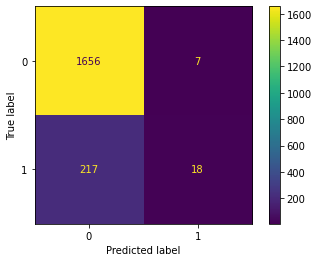

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1663
           1       0.72      0.08      0.14       235

    accuracy                           0.88      1898
   macro avg       0.80      0.54      0.54      1898
weighted avg       0.86      0.88      0.84      1898



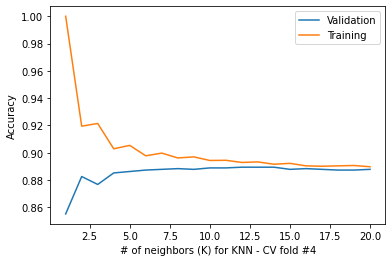

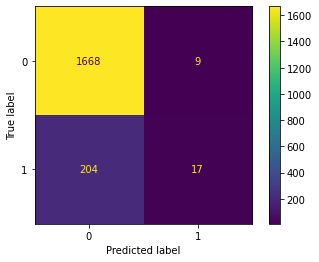

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1677
           1       0.65      0.08      0.14       221

    accuracy                           0.89      1898
   macro avg       0.77      0.54      0.54      1898
weighted avg       0.86      0.89      0.85      1898



In [83]:
knn_train_acc_mean_30p, knn_train_acc_var_30p, knn_valid_acc_mean_30p, knn_valid_acc_var_30p = \
k_fold_cross_validation('knn', 20, x_sample_data_30_percent, y_sample_data_30_percent, fold_num=5)

# Decision Tree Cross Validation for Bank Data

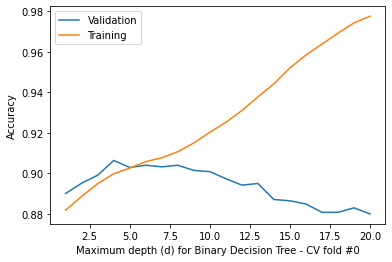

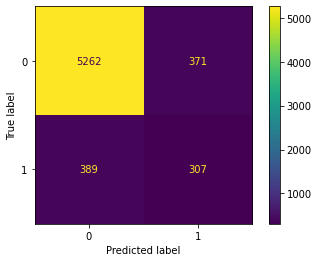

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5633
           1       0.45      0.44      0.45       696

    accuracy                           0.88      6329
   macro avg       0.69      0.69      0.69      6329
weighted avg       0.88      0.88      0.88      6329



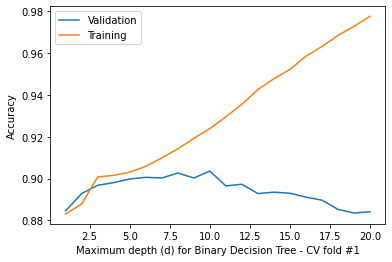

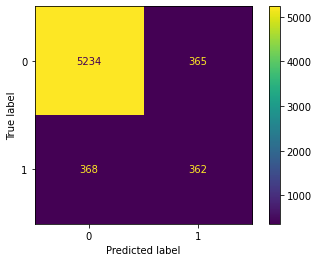

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5599
           1       0.50      0.50      0.50       730

    accuracy                           0.88      6329
   macro avg       0.72      0.72      0.72      6329
weighted avg       0.88      0.88      0.88      6329



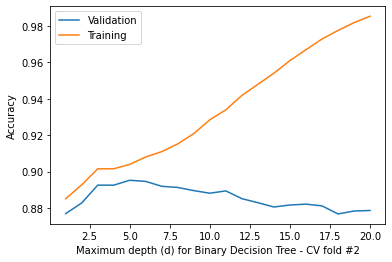

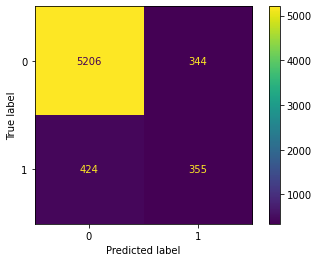

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      5550
           1       0.51      0.46      0.48       779

    accuracy                           0.88      6329
   macro avg       0.72      0.70      0.71      6329
weighted avg       0.87      0.88      0.88      6329



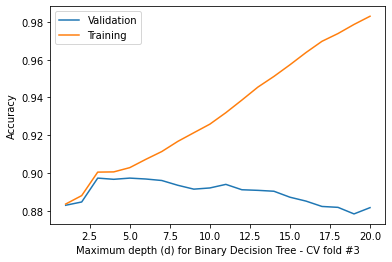

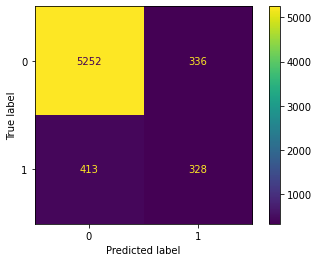

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      5588
           1       0.49      0.44      0.47       741

    accuracy                           0.88      6329
   macro avg       0.71      0.69      0.70      6329
weighted avg       0.88      0.88      0.88      6329



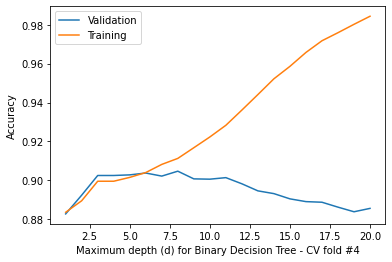

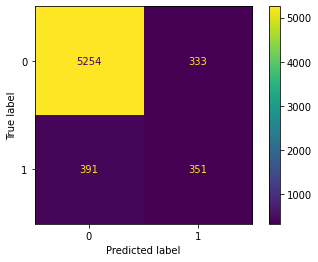

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      5587
           1       0.51      0.47      0.49       742

    accuracy                           0.89      6329
   macro avg       0.72      0.71      0.71      6329
weighted avg       0.88      0.89      0.88      6329



In [84]:
dt_train_acc_mean, dt_train_acc_var, dt_valid_acc_mean, dt_valid_acc_var = k_fold_cross_validation('decision_tree', 20, x_train, y_train, fold_num=5)

In [85]:
print('Training accuracy mean of K-fold CV, for different values of hyperparameter (max_depth)\n', dt_train_acc_mean, '\n')
print('Training accuracy Variance of K-fold, CV for different values of hyperparameter (max_depth)\n', dt_train_acc_var, '\n')
print('Validation accuracy mean of K-fold CV, for different values of hyperparameter (max_depth)\n', dt_valid_acc_mean, '\n')
print('Validation accuracy Variance of K-fold, CV for different values of hyperparameter (max_depth)\n', dt_valid_acc_var, '\n')

Training accuracy mean of K-fold CV, for different values of hyperparameter (max_depth)
 [0.88343142 0.88935582 0.89944311 0.90059639 0.90279237 0.90618113
 0.90961728 0.91363008 0.91863028 0.92415972 0.92976816 0.93663257
 0.94355227 0.94986374 0.9562147  0.96267625 0.96823729 0.97297682
 0.97753466 0.98156325] 

Training accuracy Variance of K-fold, CV for different values of hyperparameter (max_depth)
 [1.10231348e-06 3.17141317e-06 5.64884183e-06 7.36539588e-07
 6.31087885e-07 1.90848863e-06 2.19551694e-06 5.43943596e-06
 5.97231025e-06 8.10380739e-06 9.16581212e-06 1.29653181e-05
 1.17914971e-05 1.24374356e-05 1.27275838e-05 1.29281292e-05
 1.64376118e-05 1.30469340e-05 1.21808573e-05 1.13047970e-05] 

Validation accuracy mean of K-fold CV, for different values of hyperparameter (max_depth)
 [0.8834571  0.88955601 0.89764576 0.89922579 0.89960499 0.8999526
 0.89872018 0.89922579 0.89669774 0.89704535 0.89571812 0.89319008
 0.89123084 0.888924   0.88775478 0.88645916 0.88453152 0.8

Finding the best hyperparameter

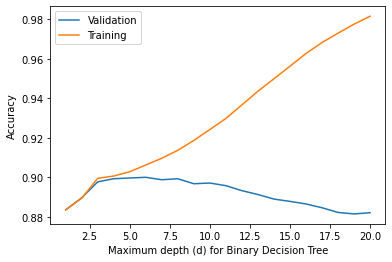

In [86]:
max_depth_range = range(1,len(dt_train_acc_mean)+1)
plt.plot(max_depth_range, dt_valid_acc_mean)
plt.xlabel('Maximum depth (d) for Binary Decision Tree')
plt.ylabel('Accuracy')
plt.plot(max_depth_range, dt_train_acc_mean)
plt.legend(['Validation', 'Training'])
plt.show()

The best value for max_depth is approximately 6. So, we pick **max_depth=6**.

# Sampling growing subsets of the training/validation data (DT - Bank data)

### 1% of whole training/validation data

In [87]:
sample_idx_1_percent = random.sample(range(x_train.shape[0]), int(x_train.shape[0] * 0.01))
x_sample_data_1_percent = x_train.copy()[sample_idx_1_percent,:]
y_sample_data_1_percent = y_train.copy()[sample_idx_1_percent]
x_sample_data_1_percent.shape

(316, 51)

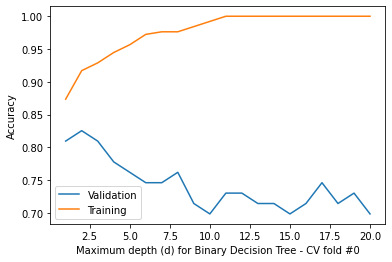

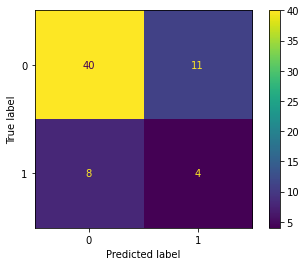

              precision    recall  f1-score   support

           0       0.83      0.78      0.81        51
           1       0.27      0.33      0.30        12

    accuracy                           0.70        63
   macro avg       0.55      0.56      0.55        63
weighted avg       0.73      0.70      0.71        63



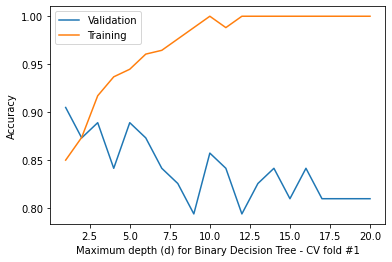

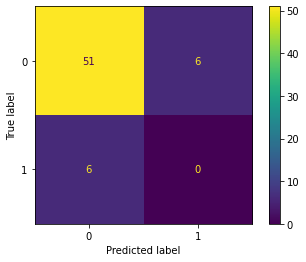

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        57
           1       0.00      0.00      0.00         6

    accuracy                           0.81        63
   macro avg       0.45      0.45      0.45        63
weighted avg       0.81      0.81      0.81        63



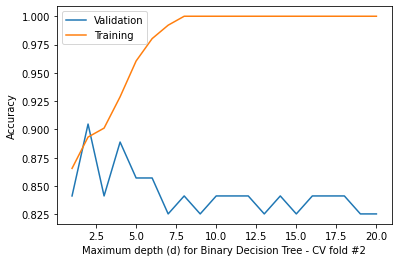

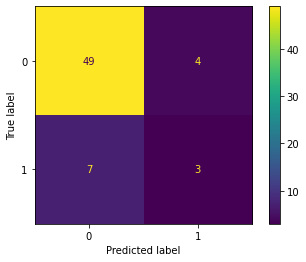

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        53
           1       0.43      0.30      0.35        10

    accuracy                           0.83        63
   macro avg       0.65      0.61      0.63        63
weighted avg       0.80      0.83      0.81        63



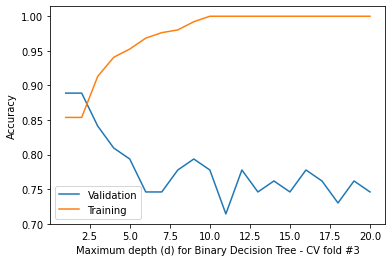

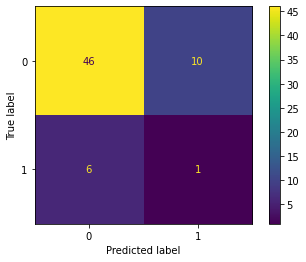

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        56
           1       0.09      0.14      0.11         7

    accuracy                           0.75        63
   macro avg       0.49      0.48      0.48        63
weighted avg       0.80      0.75      0.77        63



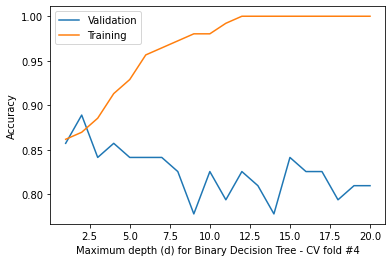

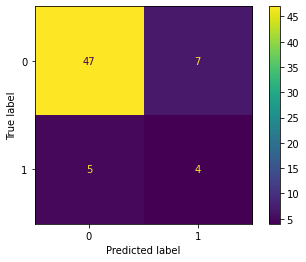

              precision    recall  f1-score   support

           0       0.90      0.87      0.89        54
           1       0.36      0.44      0.40         9

    accuracy                           0.81        63
   macro avg       0.63      0.66      0.64        63
weighted avg       0.83      0.81      0.82        63



In [88]:
dt_train_acc_mean_1p, dt_train_acc_var_1p, dt_valid_acc_mean_1p, dt_valid_acc_var_1p = \
k_fold_cross_validation('decision_tree', 20, x_sample_data_1_percent, y_sample_data_1_percent, fold_num=5)

### 5% of whole training/validation data

In [89]:
sample_idx_5_percent = random.sample(range(x_train.shape[0]), int(x_train.shape[0] * 0.05))
x_sample_data_5_percent = x_train.copy()[sample_idx_5_percent,:]
y_sample_data_5_percent = y_train.copy()[sample_idx_5_percent]
x_sample_data_5_percent.shape

(1582, 51)

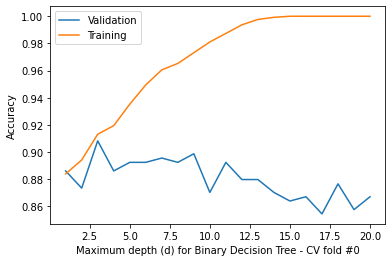

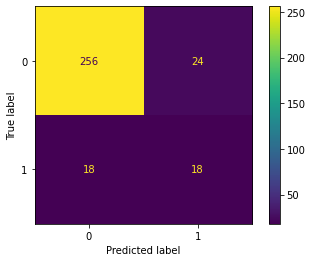

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       280
           1       0.43      0.50      0.46        36

    accuracy                           0.87       316
   macro avg       0.68      0.71      0.69       316
weighted avg       0.88      0.87      0.87       316



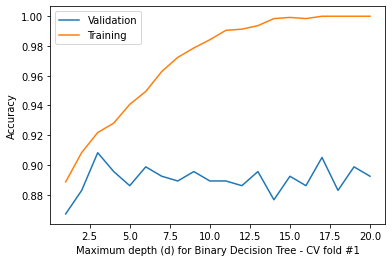

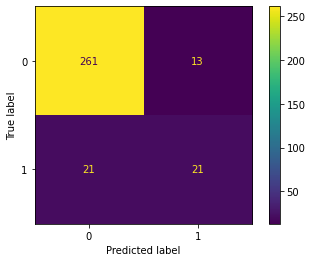

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       274
           1       0.62      0.50      0.55        42

    accuracy                           0.89       316
   macro avg       0.77      0.73      0.75       316
weighted avg       0.88      0.89      0.89       316



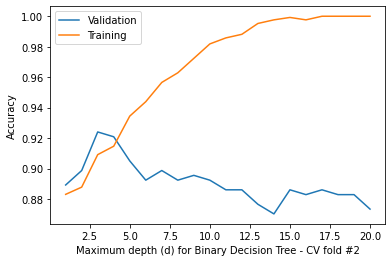

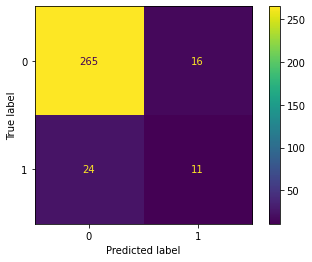

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       281
           1       0.41      0.31      0.35        35

    accuracy                           0.87       316
   macro avg       0.66      0.63      0.64       316
weighted avg       0.86      0.87      0.87       316



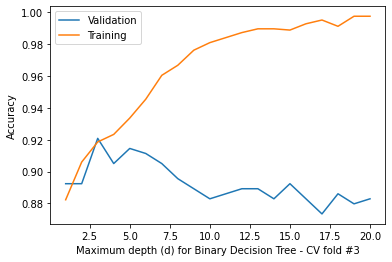

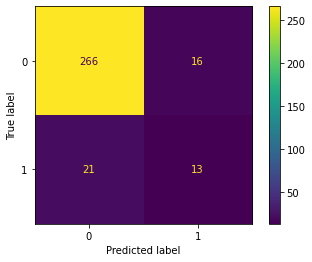

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       282
           1       0.45      0.38      0.41        34

    accuracy                           0.88       316
   macro avg       0.69      0.66      0.67       316
weighted avg       0.88      0.88      0.88       316



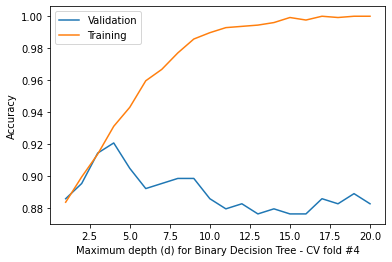

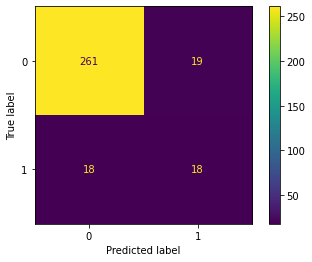

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       280
           1       0.49      0.50      0.49        36

    accuracy                           0.88       316
   macro avg       0.71      0.72      0.71       316
weighted avg       0.88      0.88      0.88       316



In [90]:
dt_train_acc_mean_5p, dt_train_acc_var_5p, dt_valid_acc_mean_5p, dt_valid_acc_var_5p = \
k_fold_cross_validation('decision_tree', 20, x_sample_data_5_percent, y_sample_data_5_percent, fold_num=5)

### 15% of whole training/validation data

In [91]:
sample_idx_15_percent = random.sample(range(x_train.shape[0]), int(x_train.shape[0] * 0.15))
x_sample_data_15_percent = x_train.copy()[sample_idx_15_percent,:]
y_sample_data_15_percent = y_train.copy()[sample_idx_15_percent]
x_sample_data_15_percent.shape

(4747, 51)

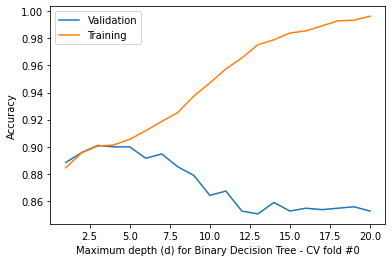

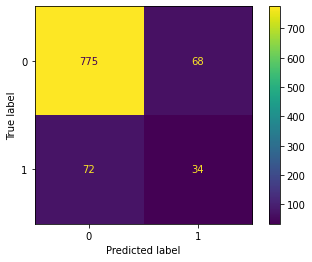

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       843
           1       0.33      0.32      0.33       106

    accuracy                           0.85       949
   macro avg       0.62      0.62      0.62       949
weighted avg       0.85      0.85      0.85       949



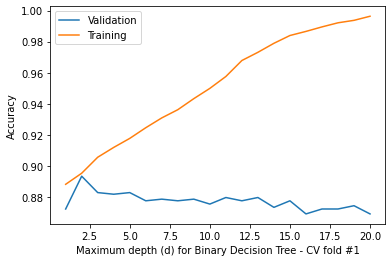

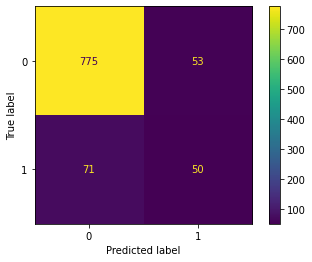

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       828
           1       0.49      0.41      0.45       121

    accuracy                           0.87       949
   macro avg       0.70      0.67      0.69       949
weighted avg       0.86      0.87      0.86       949



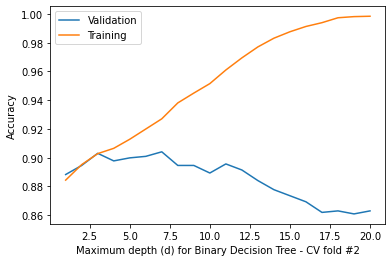

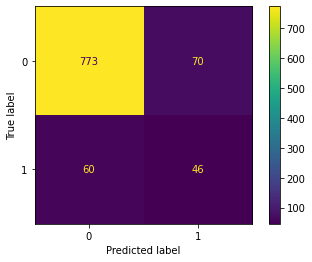

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       843
           1       0.40      0.43      0.41       106

    accuracy                           0.86       949
   macro avg       0.66      0.68      0.67       949
weighted avg       0.87      0.86      0.87       949



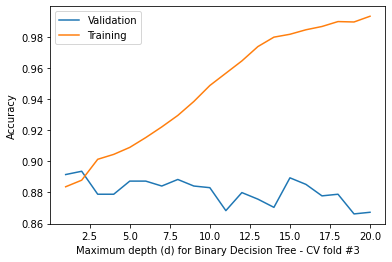

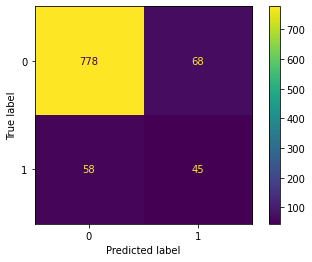

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       846
           1       0.40      0.44      0.42       103

    accuracy                           0.87       949
   macro avg       0.66      0.68      0.67       949
weighted avg       0.87      0.87      0.87       949



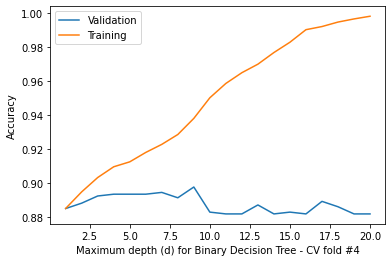

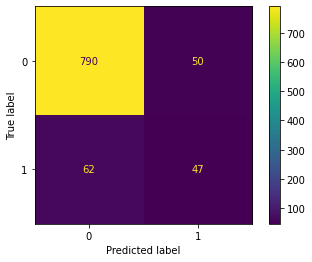

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       840
           1       0.48      0.43      0.46       109

    accuracy                           0.88       949
   macro avg       0.71      0.69      0.70       949
weighted avg       0.88      0.88      0.88       949



In [92]:
dt_train_acc_mean_15p, dt_train_acc_var_15p, dt_valid_acc_mean_15p, dt_valid_acc_var_15p = \
k_fold_cross_validation('decision_tree', 20, x_sample_data_15_percent, y_sample_data_15_percent, fold_num=5)

### 30% of whole training/validation data

In [93]:
sample_idx_30_percent = random.sample(range(x_train.shape[0]), int(x_train.shape[0] * 0.3))
x_sample_data_30_percent = x_train.copy()[sample_idx_30_percent,:]
y_sample_data_30_percent = y_train.copy()[sample_idx_30_percent]
x_sample_data_30_percent.shape

(9494, 51)

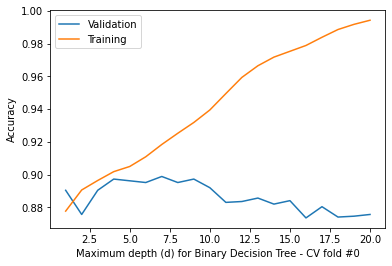

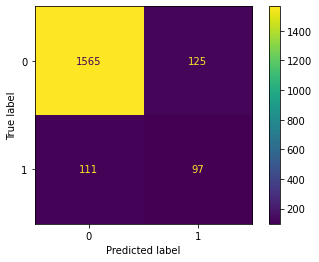

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1690
           1       0.44      0.47      0.45       208

    accuracy                           0.88      1898
   macro avg       0.69      0.70      0.69      1898
weighted avg       0.88      0.88      0.88      1898



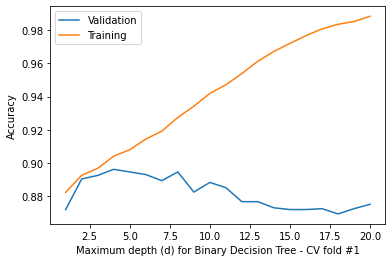

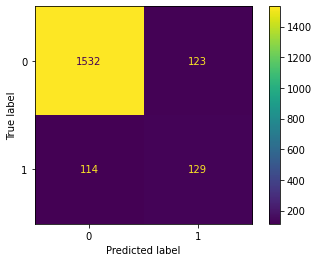

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1655
           1       0.51      0.53      0.52       243

    accuracy                           0.88      1898
   macro avg       0.72      0.73      0.72      1898
weighted avg       0.88      0.88      0.88      1898



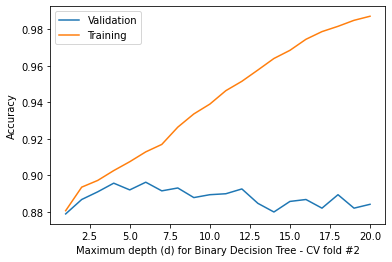

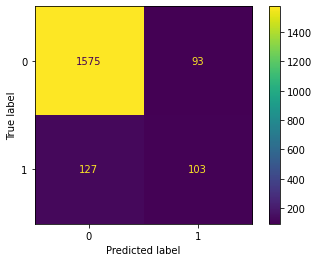

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1668
           1       0.53      0.45      0.48       230

    accuracy                           0.88      1898
   macro avg       0.73      0.70      0.71      1898
weighted avg       0.88      0.88      0.88      1898



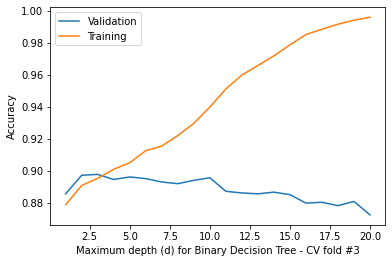

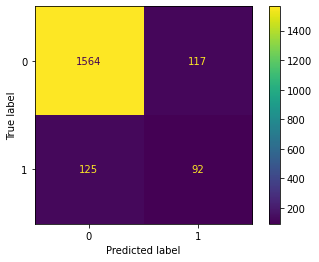

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1681
           1       0.44      0.42      0.43       217

    accuracy                           0.87      1898
   macro avg       0.68      0.68      0.68      1898
weighted avg       0.87      0.87      0.87      1898



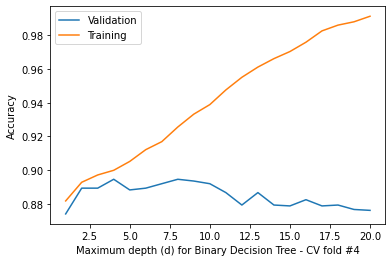

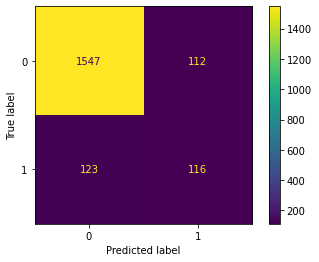

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1659
           1       0.51      0.49      0.50       239

    accuracy                           0.88      1898
   macro avg       0.72      0.71      0.71      1898
weighted avg       0.87      0.88      0.87      1898



In [94]:
dt_train_acc_mean_30p, dt_train_acc_var_30p, dt_valid_acc_mean_30p, dt_valid_acc_var_30p = \
k_fold_cross_validation('decision_tree', 20, x_sample_data_30_percent, y_sample_data_30_percent, fold_num=5)

# Best KNN model for Bank Data (Applying to the test data)

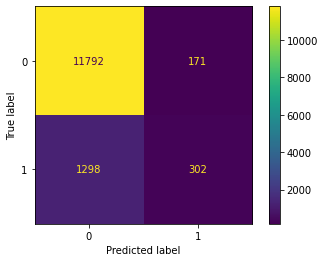

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11963
           1       0.64      0.19      0.29      1600

    accuracy                           0.89     13563
   macro avg       0.77      0.59      0.62     13563
weighted avg       0.87      0.89      0.86     13563



In [95]:
knn_train_acc_final, knn_test_acc = knn_best(x_train, y_train, x_test, y_test, 6)

In [96]:
print('Training accuracy, for the KNN model with the best hyperparameter (6 neighbors): %', 100*knn_train_acc_final, '\n')
print('Testing accuracy, for the KNN model with the best hyperparameter (6 neighbors): %', 100*knn_test_acc, '\n')

Training accuracy, for the KNN model with the best hyperparameter (6 neighbors): % 90.5144084934277 

Testing accuracy, for the KNN model with the best hyperparameter (6 neighbors): % 89.16906289169063 



# Best DT model for Bank Data (Applying to the test data)

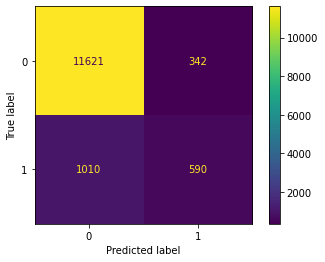

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11963
           1       0.63      0.37      0.47      1600

    accuracy                           0.90     13563
   macro avg       0.78      0.67      0.71     13563
weighted avg       0.89      0.90      0.89     13563



In [97]:
DT_train_acc_final, DT_test_acc = decision_tree_best(x_train, y_train, x_test, y_test, 6)

In [98]:
print('Training accuracy, for the Binary Decision Tree model with the best hyperparameter (max_depth=6): %', 100*DT_train_acc_final, '\n')
print('Testing accuracy, for the Binary Decision Tree model with the best hyperparameter (max_depth=6): %', 100*DT_test_acc, '\n')

Training accuracy, for the Binary Decision Tree model with the best hyperparameter (max_depth=6): % 90.42277553083923 

Testing accuracy, for the Binary Decision Tree model with the best hyperparameter (max_depth=6): % 90.03170390031704 

